In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# Set Random Seed
seed = np.random.seed(2024)
sns.set_theme(context = 'paper')
# 1. darkolivegreen
# 2. olive
# 3. darkkhaki
# 4. yellowgreen
# 5. olivedrab

### <span style="color: darkkhaki;"> 

In [2]:
print("My pandas version is: ", pd.__version__)
print("My numpy version is: ", np.__version__)

import matplotlib
print('My matplotlib is:', matplotlib.__version__)
print('My seaborn is:', sns.__version__)

import sklearn
print('My sklearn is:', sklearn.__version__)

My pandas version is:  2.0.3
My numpy version is:  1.24.3
My matplotlib is: 3.7.2
My seaborn is: 0.12.2
My sklearn is: 1.5.1


In [63]:
## StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# ReSampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
# Dimensionality Reduction
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import matplotlib.patches as mpatches

# Learning Curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import learning_curve


from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression #1
from sklearn.neighbors import KNeighborsClassifier #2
from sklearn.tree import DecisionTreeClassifier #3
from sklearn.ensemble import RandomForestClassifier #4
from sklearn.ensemble import GradientBoostingClassifier #5
from sklearn.svm import SVC #6
from sklearn.naive_bayes import GaussianNB #7


# Evaluating on Test Data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import roc_auc_score, classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef



# <span style="color: darkolivegreen;"> Credit Card Fraud Detection</span>

The performance of fraud detection in credit card transactions is greatly affected by the **sampling approach on dataset**, **selection of variables** and **detection technique(s)** used.

**<span style="color: olive;">Objective**

**<span style="color: olive;">Project Pipeline**
- Import and understand the fraud data
- See if the data has any shortcomings like missing data or imbalance, and then fix them
- Train models on the data using K-Fold Cross Validation
- Evaluate the performance of the models using various metrics
- Rank the model based on their performance and visualize the results

**<span style="color: olive;">i. Data Understanding**
    
**<span style="color: olive;">ii. Data Preparation**

**<span style="color: olive;">iii. Modeling**

**<span style="color: olive;">iv. Evaluation**

## <span style="color: olive;">Objective
### <span style="color: darkkhaki;">Credit Card Fraud 
Credit card fraud is the unauthorized use of a credit card to make purchases or withdraw funds.
### <span style="color: darkkhaki;">Source 
The dataset contains transactions made by credit cards in September 2013 by European cardholders, and also available in Kaggle.
### <span style="color: darkkhaki;">Objective
to detect fraudulent credit card transactions or not based on synthetic features

## <span style="color: olive;">i. Data Understanding
- It contains only numerical input variables which are the result of a PCA transformation. 
- There are a total of 31 features in the dataset.
    - `V1, V2, … V28` are the principal components obtained with PCA
    - `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.
    - `Amount` is the transaction Amount
    - Target: `Class` 1 in case of fraud and 0 otherwise.
### <span style="color: darkkhaki;">a. Load the dataset

In [4]:
df = pd.read_csv('creditcard.csv')
display(df.head())
print('Number column of the dataset:', df.shape[0])
print('Number row of the dataset:', df.shape[1])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Number column of the dataset: 284807
Number row of the dataset: 31


### <span style="color: darkkhaki;"> b. Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### <span style="color: darkkhaki;"> c. Class Distribution

In [7]:
class_counts = df['Class'].value_counts()
display(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64

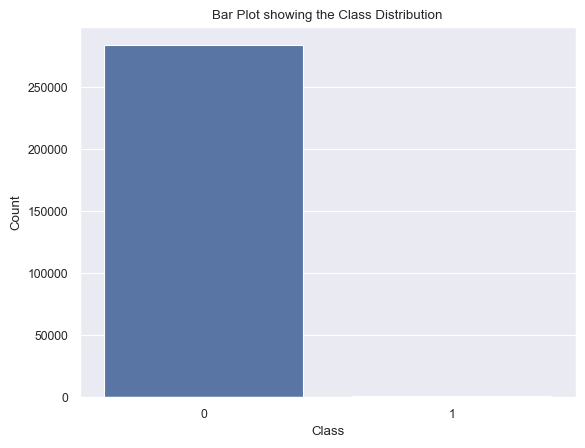

In [8]:
sns.barplot(x=class_counts.index, y=class_counts.values);
plt.title('Bar Plot showing the Class Distribution');
plt.xlabel('Class');
plt.ylabel('Count');

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/class_distri_bar')

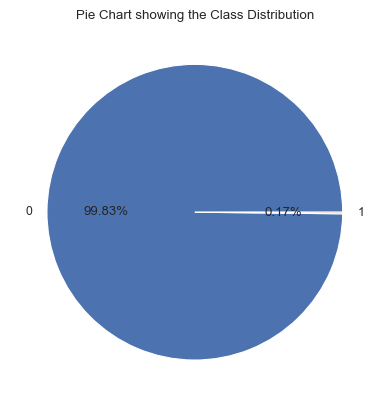

In [9]:
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Pie Chart showing the Class Distribution');

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/class_distribution_pie')

As we can see, the dataset is very imbalanced as most of the transaction are **Non-Fraud**. Use this dataset for predictive models might cause a lot of errors because the models will tend to overfit since it gonna assume the most transactions are Non-Fraud

# <span style="color: olive;"> ii. Data Preparation
## <span style="color: darkkhaki;"> 1. Data Cleaning (Outlier Detection) 
### <span style="color: yellowgreen;"> a. Check for `Null` value

In [10]:
# CHECK
df.isna().sum().sum()

0

### <span style="color: yellowgreen;"> b. Check for Duplicates

In [11]:
# CHECK
df.duplicated().sum()

1081

There are 1081 duplicated rows in the dataset. Duplicate rows can skew the analysis and the results of the model trainning, as they can introduce bias and potentially lead to overfitting.
Removing duplicates is generally a good practice in data preprocessing, especially in a sensitive task like fraud detection where accuracy is critical. So, I am gonna remove that.

In [12]:
# Remove the Duplicate Rows
df = df.drop_duplicates()
# Verify the number of rows after removing duplicates
print('Number of rows after removing duplicates:',df.shape[0])

Number of rows after removing duplicates: 283726


In [13]:
class_counts = df['Class'].value_counts()
display(class_counts)

Class
0    283253
1       473
Name: count, dtype: int64

## <span style="color: darkkhaki;"> 2. Data Transformation
### <span style="color: yellowgreen;"> a. Variable Scaling
https://hersanyagci.medium.com/feature-scaling-with-scikit-learn-for-data-science-8c4cbcf2daff

### Plot the distribution of Transaction `Amount` and `Time`    

/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_5115/1534364072.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'], ax=axes[0])
/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_5115/1534364072.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], ax=a

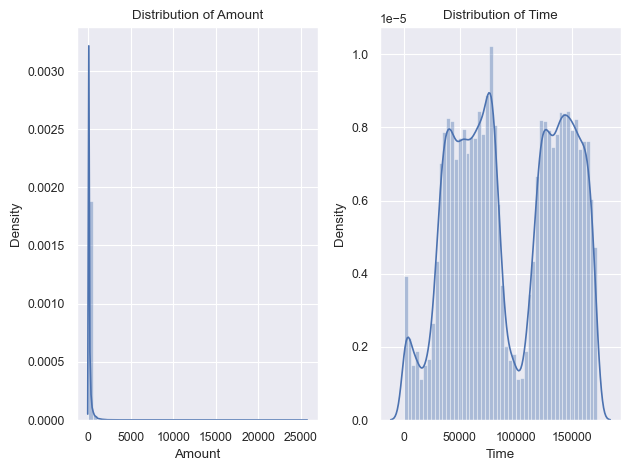

In [14]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)  # Adjust figsize as needed

# Plot the distribution of 'Amount' on the first subplot
sns.distplot(df['Amount'], ax=axes[0])
axes[0].set_title('Distribution of Amount')

# Plot the distribution of 'Time' on the second subplot
sns.distplot(df['Time'], ax=axes[1])
axes[1].set_title('Distribution of Time')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/amount_time_distributionplot')

plt.show()

### Box Plot of  Transaction `Amount` and `Time` 

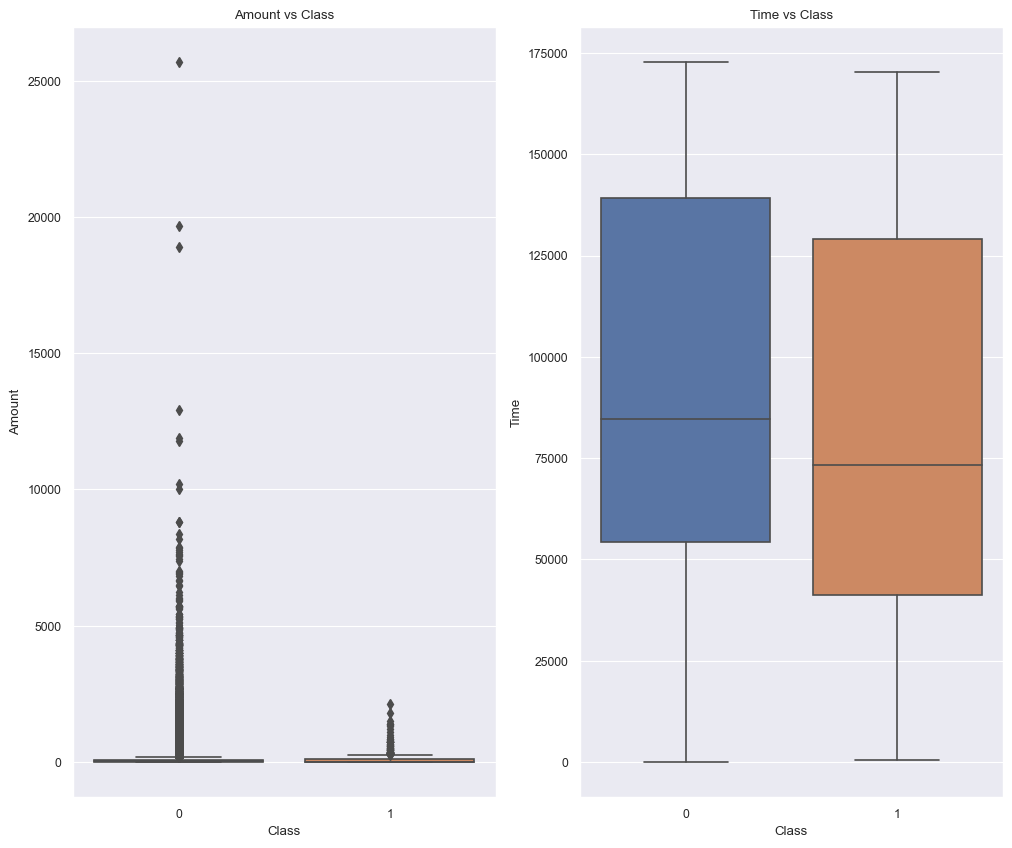

In [15]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
## Boxplot of 'Amount' vs 'Class'
sns.boxplot(data=df, x='Class', y='Amount', ax=axes[0])
axes[0].set_title('Amount vs Class');
## Boxplot of 'Time' vs 'Class'
sns.boxplot(data=df, x='Class', y='Time', ax=axes[1])
axes[1].set_title('Time vs Class');

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/amount_time_boxplot')


### Scaling Transaction `Amount`

`Amount` is not normally distributed. So I either do `RobustScaler` or `Log Transformation`

Im choosing `Log Transformation` in this case as Applying a logarithmic transformation can help in reducing the skewness of the distribution. This can be particularly useful if your transaction amounts span several orders of magnitude.

/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_5115/3929939547.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_scaled['Amount_scaled'].values);


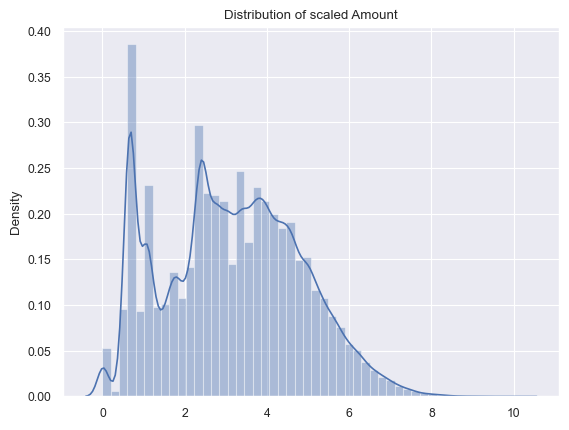

In [16]:
df_scaled = df.copy()

df_scaled['Amount_scaled'] = np.log1p(df_scaled['Amount'])  # log1p is used to avoid log(0)
sns.distplot(df_scaled['Amount_scaled'].values);
plt.title('Distribution of scaled Amount');

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/scaled_Amount_distribution')


### Scaling Transaction `Time`
Transaction Time often represents the time elapsed since a reference point (e.g., the start of data collection). It's a continuous variable, and its distribution can vary significantly.
We can use `StandardScaler` or `MinMaxScaler`:
- `StandardScaler`: This scaler standardizes features by removing the mean and scaling to unit variance. It's useful if the transaction times are normally distributed.
- `MinMaxScaler`: This scaler scales features to a range, typically between 0 and 1. It's useful if the transaction times have a known range or if we want to normalize the time values.

Im choosing `StandardScaler` in this case as the `Time` is not really skewed.

/var/folders/3v/hv8gygz544x36c5wqqmmn5c80000gn/T/ipykernel_5115/3089868195.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_scaled['Time_scaled'].values);


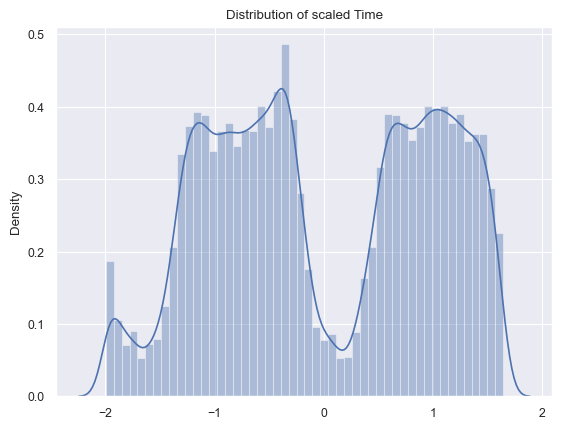

In [17]:
scaler = StandardScaler()
df_scaled['Time_scaled'] = scaler.fit_transform(df_scaled[['Time']])

sns.distplot(df_scaled['Time_scaled'].values);
plt.title('Distribution of scaled Time');

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/scaled_Time_distribution')


### Box Plot of  Transaction `Amount_scaled` and `Time_scaled` 
https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8

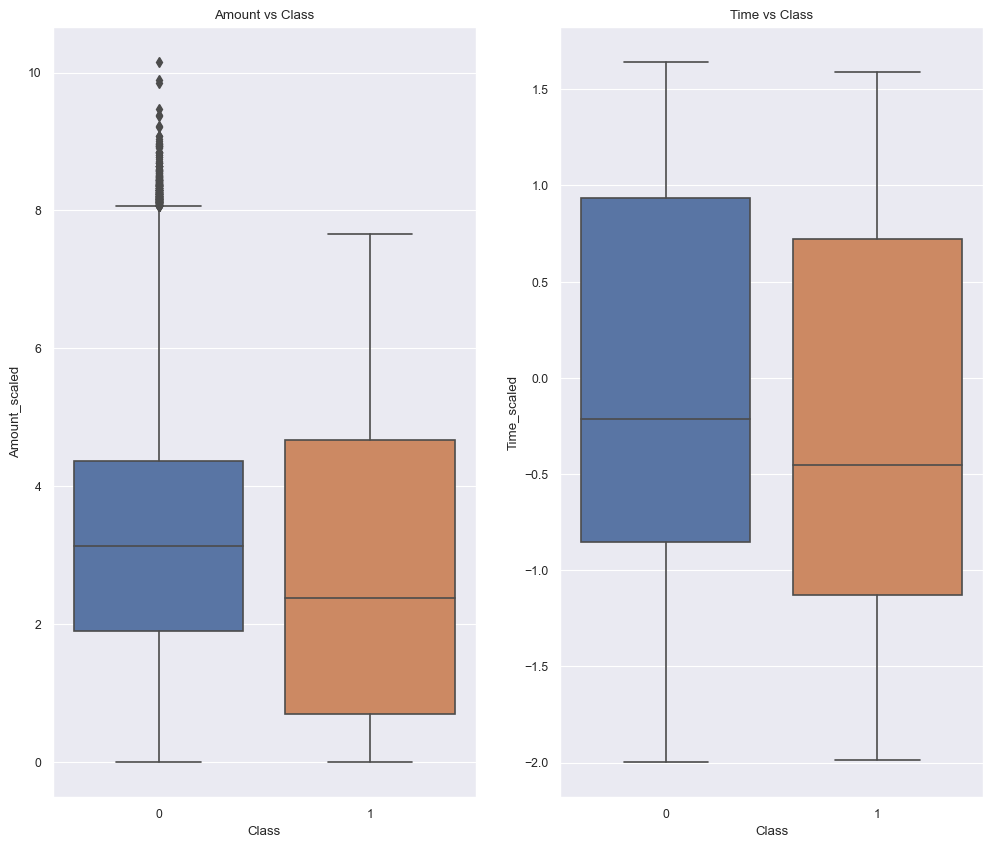

In [18]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
## Boxplot of 'Amount_scaled' vs 'Class'
sns.boxplot(data=df_scaled, x='Class', y='Amount_scaled', ax=axes[0])
axes[0].set_title('Amount vs Class');
## Boxplot of 'Time_scaled' vs 'Class'
sns.boxplot(data=df_scaled, x='Class', y='Time_scaled', ax=axes[1])
axes[1].set_title('Time vs Class');

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/boxplot_scaled_TimeAmount')


There are still some outliers in `Amount_scaled` after scaling, but I decide not to dropping outliers based on the context of the analysis.

The outliers in the `Non-Fraud` class, so it kinda make sense and it might be **True Outliers** as the outliers are true reflections of the underlying population (e.g., rare but legitimate high-value transactions) => We might not want to remove the,, as they provide valuable information

### Check the new scaled dataset

In [19]:
display(df_scaled.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled,Time_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760,-1.996823
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626,-1.996823
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276,-1.996802
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306,-1.996802
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539,-1.996781


### Remove Unscaled variables: `Amount` and `Time`

In [20]:
df_scaled.drop(['Time', 'Amount'], axis=1, inplace=True)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,Time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760,-1.996823
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626,-1.996823
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276,-1.996802
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306,-1.996802
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539,-1.996781


### Correlation Matrices
#### Before `scaled`

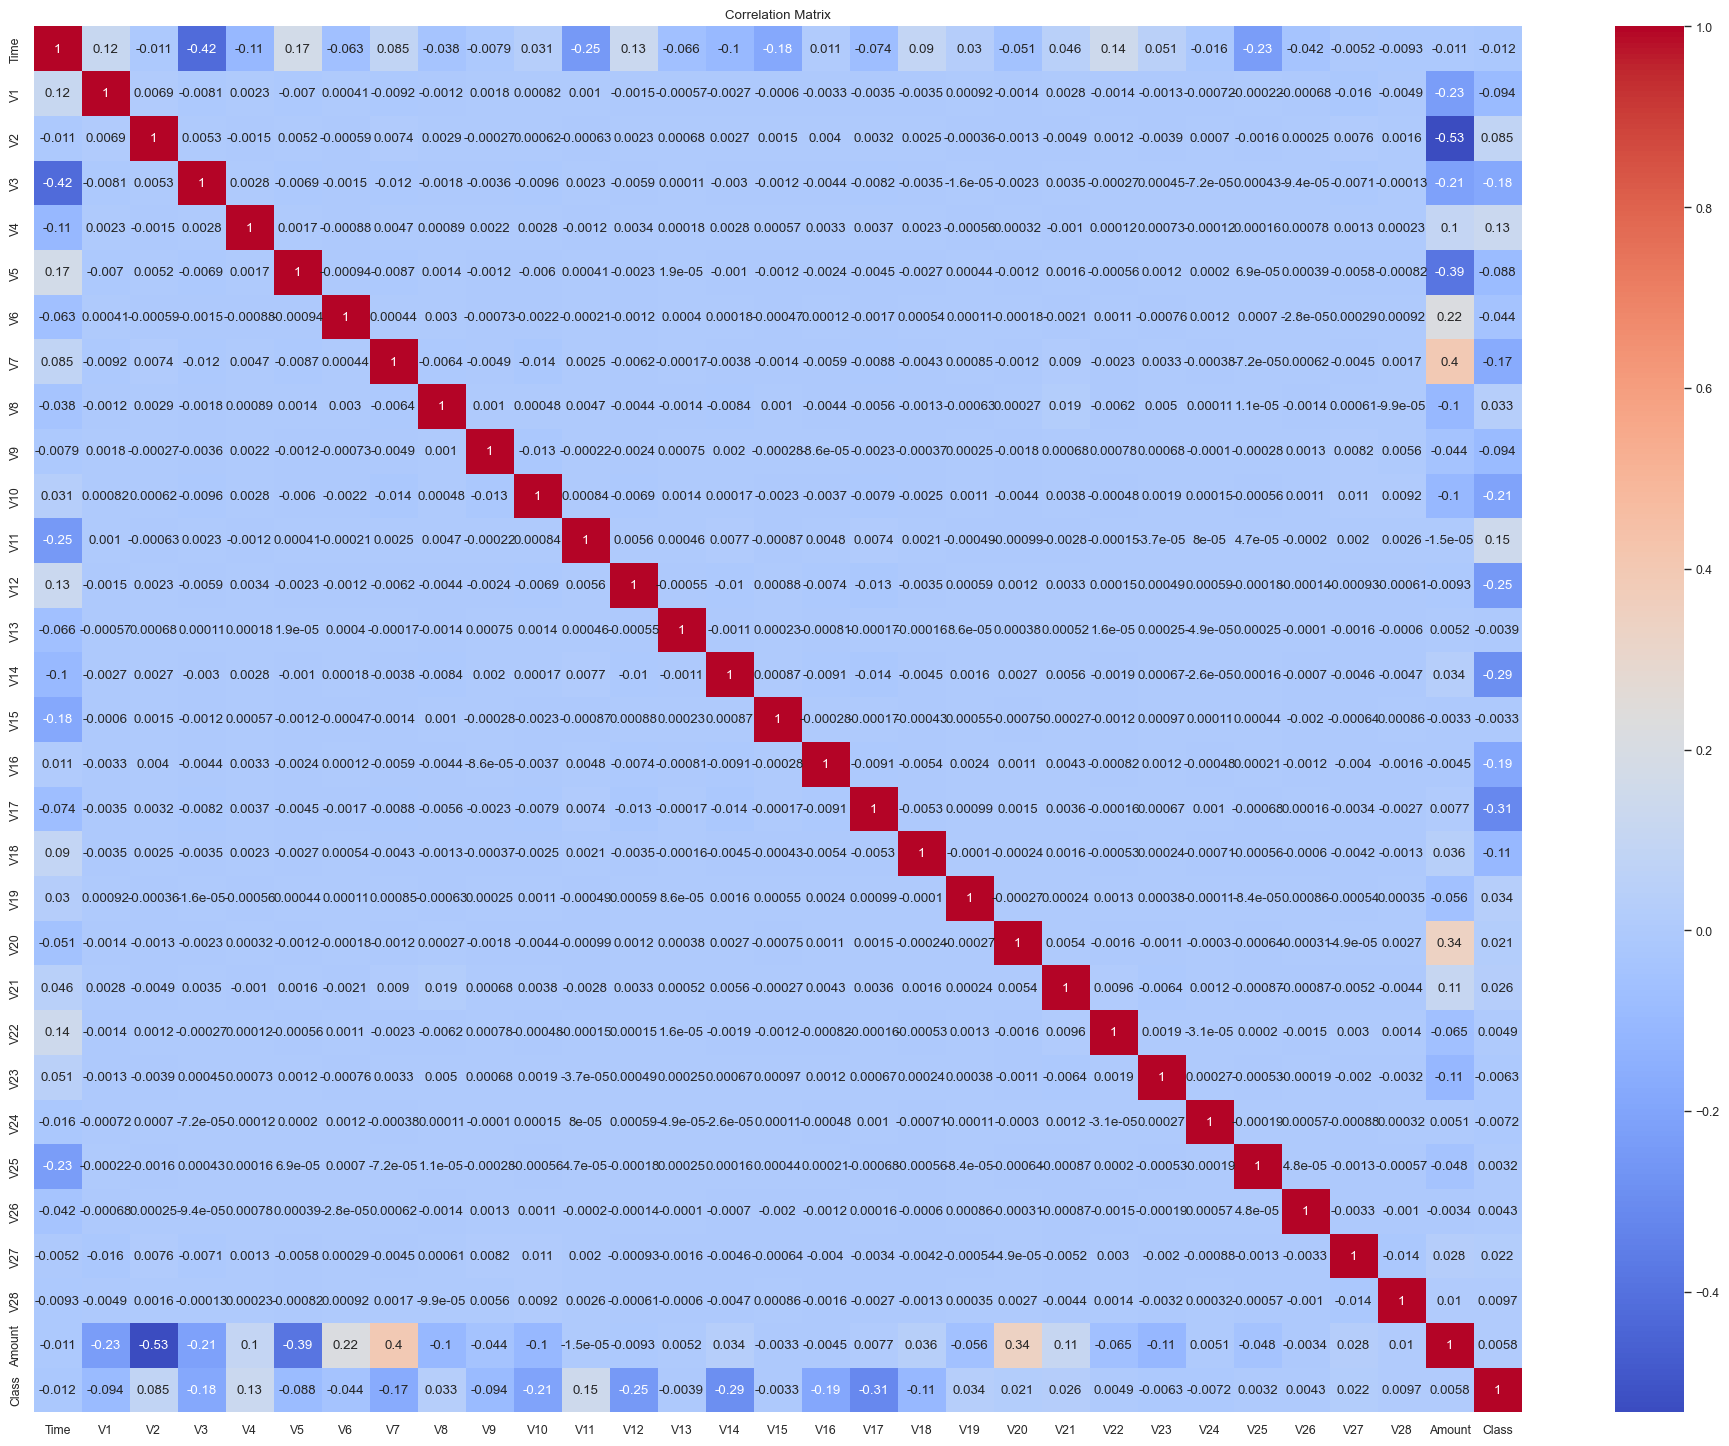

In [21]:
# Correlation
corr = df.corr()
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap='coolwarm', annot=True);
plt.title('Correlation Matrix');

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/correlationMatrix_before')


#### After `scaled`

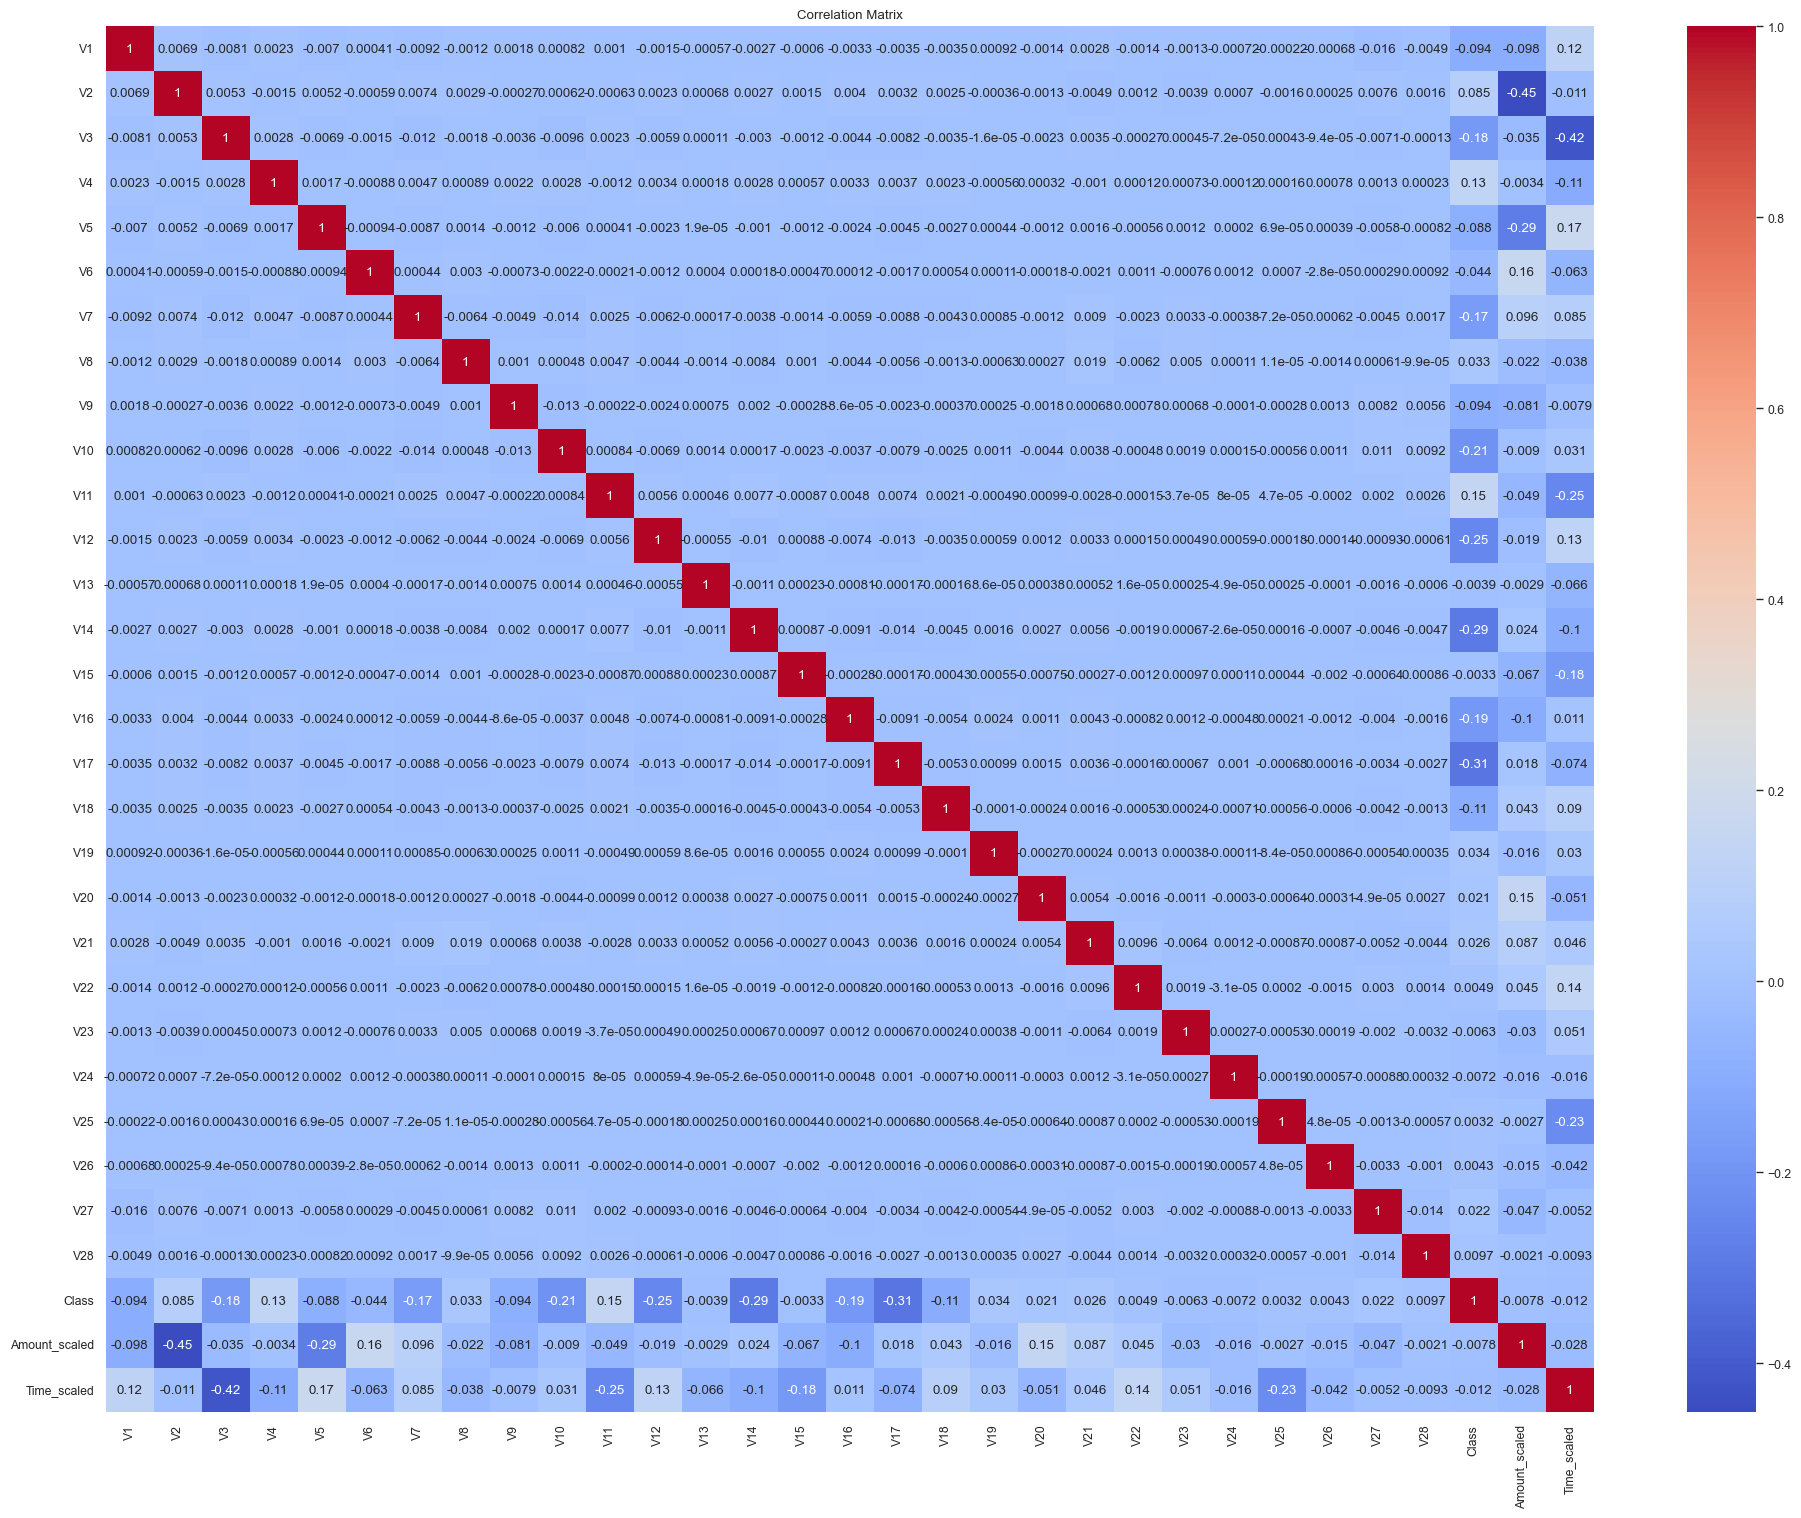

In [22]:
# Correlation
corr = df_scaled.corr()
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap='coolwarm', annot=True);
plt.title('Correlation Matrix');

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/correlationMatrix_after')


There is no Strong Correlation

### <span style="color: yellowgreen;"> a. Resampling (Imbalanced data) 
https://hersanyagci.medium.com/random-resampling-methods-for-imbalanced-data-with-imblearn-1fbba4a0e6d3
    
 <span style="color: red;"> Apply on the **Training data only**    

https://imbalanced-learn.org/stable/references/under_sampling.html
    
https://hersanyagci.medium.com/under-sampling-methods-for-imbalanced-data-clustercentroids-randomundersampler-nearmiss-eae0eadcc145
    
https://imbalanced-learn.org/stable/auto_examples/under-sampling/plot_comparison_under_sampling.html#sphx-glr-auto-examples-under-sampling-plot-comparison-under-sampling-py
    
## --------------------------------------------------------------------------------------

### Correlation Matrix (after `scaled` and `resampling`

In [ ]:
# Convert y_train_SMOTE to a DataFrame and name the column
y_train_SMOTE_df = pd.DataFrame(y_train_SMOTE, columns=['Class'])

# Combine X_train_SMOTE with y_train_SMOTE
df_train_SMOTE = pd.concat([X_train_SMOTE.reset_index(drop=True), 
                            y_train_SMOTE_df.reset_index(drop=True)], axis=1)
# Compute the correlation matrix
corr = df_train_SMOTE.corr()
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap='coolwarm', annot=True);
plt.title('Correlation Matrix');

In [ ]:
# Find strong correlations
strong_corrs = corr[(corr >= 0.70) | (corr <= -0.70)]
# Plot the heatmap for strong correlations
plt.figure(figsize=(12, 10))
sns.heatmap(strong_corrs, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Strong Correlations')
plt.show()

https://medium.com/@abdallahashraf90x/all-you-need-to-know-about-correlation-for-machine-learning-e249fec292e9#:~:text=As%20researchers%20we%20rely%20on,little%20connection%20between%20the%20variables.

- **Strong Positive Correlation** (0.70 ≤r≤ 1.00): `V4` vs `Class`
- **Strong Negative Correlation** (-1.00 ≤r≤ -0.70): `V14` vs `Class`, `V12` vs `Class`

### Boxplots of Strong Positive Correlation Pairs

In [ ]:
"""
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
## Boxplot of 'V12' vs 'Class'
sns.boxplot(data=df_train_SMOTE, x='Class', y='V12', ax=axes[0])
axes[0].set_title('V12 vs Class');
## Boxplot of  vs 'V14' vs 'Class'
sns.boxplot(data=df_train_SMOTE, x='Class', y='V14', ax=axes[1])
axes[1].set_title('V14 vs Class');
# Set a title for the entire figure
fig.suptitle('Boxplots of Strong Negative Correlation Pairs');
"""

In [ ]:
"""
# Calculate the IQR for each group in V4 and V11
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers.count()
"""

In [ ]:
"""
# Count outliers for V12
outliers_v12 = df_train_SMOTE.groupby('Class')['V12'].apply(count_outliers)
print("Number of outliers in V12 by Class:")
print(outliers_v12)
"""

"""
# Count outliers for V14
outliers_v14 = df_train_SMOTE.groupby('Class')['V14'].apply(count_outliers)
print("\nNumber of outliers in V14 by Class:")
print(outliers_v14)
"""

In [ ]:
#df_train_SMOTE.shape

In [ ]:
"""

# Function to calculate the lower and upper bounds for outliers
def get_outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Get outlier bounds for V12 and V14


bounds_v12 = df_train_SMOTE.groupby('Class')['V12'].apply(get_outlier_bounds).to_dict()
bounds_v14 = df_train_SMOTE.groupby('Class')['V14'].apply(get_outlier_bounds).to_dict()

# Function to check if a value is an outlier
def is_outlier(value, bounds):
    lower_bound, upper_bound = bounds
    return value < lower_bound or value > upper_bound

# Filter out the outliers
filtered_df = df_train_SMOTE.copy()


for class_label, (lower_bound, upper_bound) in bounds_v12.items():
    filtered_df = filtered_df[
        ~(
            (filtered_df['Class'] == class_label) & 
            (filtered_df['V12'].apply(lambda x: is_outlier(x, (lower_bound, upper_bound))))
        )
    ]

for class_label, (lower_bound, upper_bound) in bounds_v14.items():
    filtered_df = filtered_df[
        ~(
            (filtered_df['Class'] == class_label) & 
            (filtered_df['V14'].apply(lambda x: is_outlier(x, (lower_bound, upper_bound))))
        )
    ]

# Check the number of rows before and after outlier removal
print("Original DataFrame shape:", df_train_SMOTE.shape)
print("Filtered DataFrame shape:", filtered_df.shape)
"""

In [ ]:
"""

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
## Boxplot of 'V12' vs 'Class'
""" sns.boxplot(data=filtered_df, x='Class', y='V12', ax=axes[0]) """
axes[0].set_title('V12 vs Class');
## Boxplot of  vs 'V14' vs 'Class'
sns.boxplot(data=filtered_df, x='Class', y='V14', ax=axes[1])
axes[1].set_title('V14 vs Class');
# Set a title for the entire figure
fig.suptitle('Boxplots of Strong Negative Correlation Pairs');

"""

### Boxplots of Strong Negative Correlation Pairs

In [ ]:
"""
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
## Boxplot of 'V4' vs 'Class'
sns.boxplot(data=df_train_SMOTE, x='Class', y='V4', ax=axes[0])
axes[0].set_title('V4 vs Class');
## Boxplot of  vs 'V11' vs 'Class'
sns.boxplot(data=df_train_SMOTE, x='Class', y='V11', ax=axes[1])
axes[1].set_title('V11 vs Class');
# Set a title for the entire figure
fig.suptitle('Boxplots of Strong Positive Correlation Pairs');
"""

In [ ]:
"""
# Count outliers for V4
outliers_v4 = df_train_SMOTE.groupby('Class')['V4'].apply(count_outliers)
print("Number of outliers in V4 by Class:")
print(outliers_v4)

# Count outliers for V11
outliers_v11 = df_train_SMOTE.groupby('Class')['V11'].apply(count_outliers)
print("\nNumber of outliers in V11 by Class:")
print(outliers_v11)
"""

In [ ]:
"""
# Function to calculate the lower and upper bounds for outliers
def get_outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Get outlier bounds for V4 and V11
bounds_v4 = df_train_SMOTE.groupby('Class')['V4'].apply(get_outlier_bounds).to_dict()
bounds_v11 = df_train_SMOTE.groupby('Class')['V11'].apply(get_outlier_bounds).to_dict()

# Function to check if a value is an outlier
def is_outlier(value, bounds):
    lower_bound, upper_bound = bounds
    return value < lower_bound or value > upper_bound

for class_label, (lower_bound, upper_bound) in bounds_v4.items():
    filtered_df = filtered_df[
        ~(
            (filtered_df['Class'] == class_label) & 
            (filtered_df['V4'].apply(lambda x: is_outlier(x, (lower_bound, upper_bound))))
        )
    ]

for class_label, (lower_bound, upper_bound) in bounds_v11.items():
    filtered_df = filtered_df[
        ~(
            (filtered_df['Class'] == class_label) & 
            (filtered_df['V11'].apply(lambda x: is_outlier(x, (lower_bound, upper_bound))))
        )
    ]

# Check the number of rows before and after outlier removal
print("Original DataFrame shape:", df_train_SMOTE.shape)
print("Filtered DataFrame shape:", filtered_df.shape)
"""

In [ ]:
"""
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
## Boxplot of 'V4' vs 'Class'
sns.boxplot(data=filtered_df, x='Class', y='V4', ax=axes[0])
axes[0].set_title('V4 vs Class');
## Boxplot of  vs 'V11' vs 'Class'
sns.boxplot(data=filtered_df, x='Class', y='V11', ax=axes[1])
axes[1].set_title('V11 vs Class');
# Set a title for the entire figure
fig.suptitle('Boxplots of Strong Positive Correlation Pairs');
"""

### Data Distribution Split data after remove outliers

In [ ]:
"""

class_counts = filtered_df['Class'].value_counts()
display(class_counts)
## Data Distribution after remove outliers
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Pie Chart showing the Class Distribution');

"""

In [ ]:
"""

from sklearn.model_selection import train_test_split
X_train = filtered_df.drop('Class', axis=1)
y_train = filtered_df['Class']

display(y.shape)

"""

### <span style="color: yellowgreen;"> b. Feature Extraction (Feature Reduction)
Feature extraction is often used when the original features are high-dimensional and complex.     
    
https://www.youtube.com/watch?v=NEaUSP4YerM
    
https://www.ibm.com/topics/principal-component-analysis
    
https://developer.ibm.com/tutorials/awb-k-means-clustering-in-python/

In [ ]:
"""

from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the transformed data
print("Original shape of Training set:", X_train.shape)
print("Transformed shape of Training set:", X_train_scaled.shape)

print("\nOriginal shape of Test set:", X_test.shape)
print("Transformed shape of Test set:", X_test_scaled.shape)

"""

In [ ]:
"""

# Apply PCA
pca = PCA(n_components=0.95)  # Preserve 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check the shape of the transformed data
print("Original training feature shape:", X_train_scaled.shape)
print("Reduced training feature shape after PCA:", X_train_pca.shape)

print("\nOriginal test feature shape:", X_test_scaled.shape)
print("Reduced test feature shape after PCA:", X_test_pca.shape)

"""

## <span style="color: olive;">iii. Modeling

In [ ]:
"""

# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
# 2. K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
# 3. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# 4. Random Forest
from sklearn.ensemble import RandomForestClassifier
# 5. XGBoost
from sklearn.ensemble import GradientBoostingClassifier
# 6. Support Vector Machine (SVM)
from sklearn.svm import SVC

"""

In [ ]:
"""

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve, roc_auc_score

"""

### <span style="color: darkkhaki;"> 1. Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    
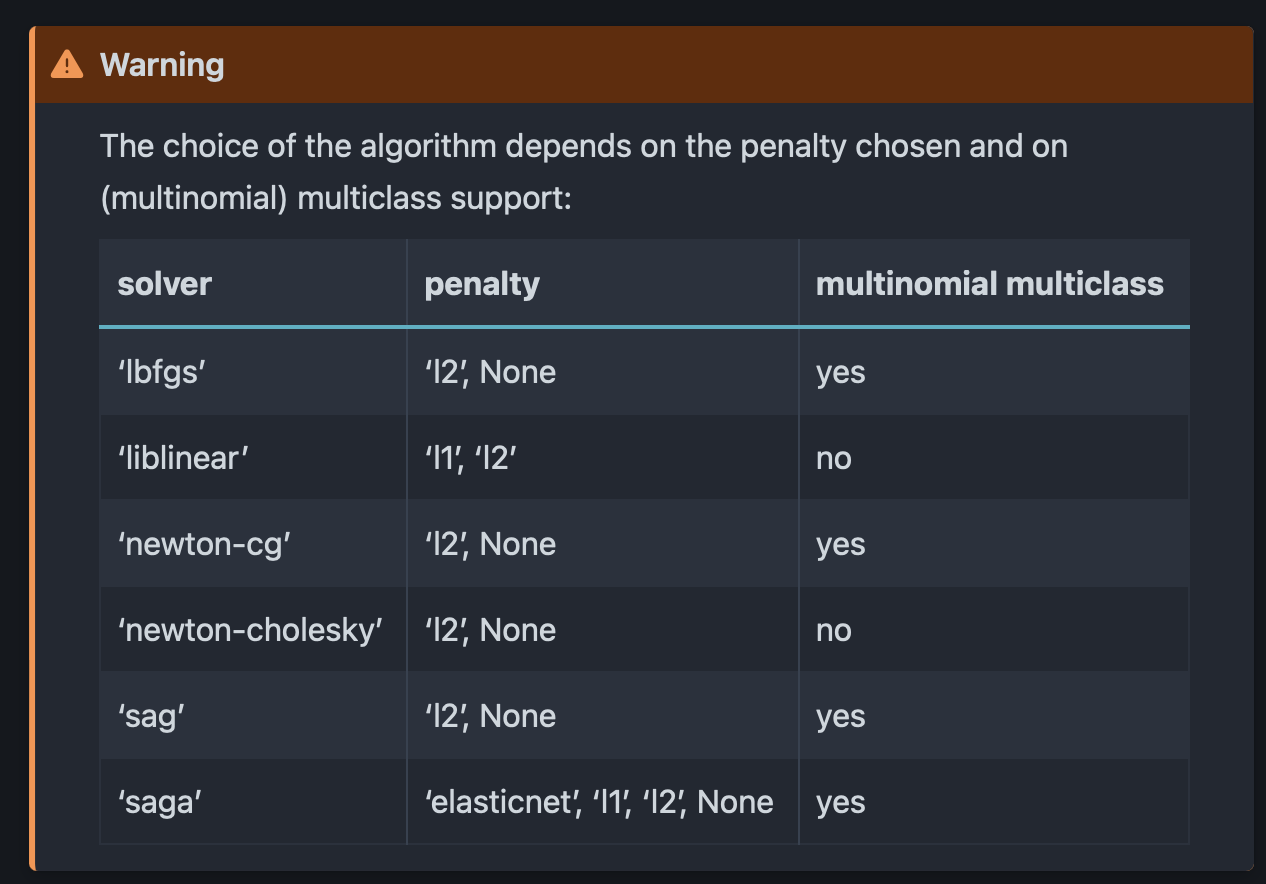

In [ ]:
"""

## Step 1: Define Model
LogisticRegression = LogisticRegression(class_weight='balanced')
## Step 2: Define the hyperparameter grid
param_grid_LR = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1], # Inverse of regularization strength
    'solver': ['liblinear'],
    'max_iter': [100, 200, 500]
}
## Step 3: Set up Grid Search with 5-fold Cross-Validation
grid_search_LR = GridSearchCV(LogisticRegression, 
                              param_grid_LR, 
                           cv=5, scoring='accuracy')
                           
"""                           

In [ ]:
"""
## Step 4: Fit the model on the Resampling training data 
grid_search_LR.fit(X_train_pca, y_train)
"""

In [ ]:
"""
## Step 5: Best Hyperparameters
best_model_LR = grid_search_LR.best_estimator_
"""

In [ ]:
"""
## Step 6: Evaluation
y_pred_LR = best_model_LR.predict(X_test_pca)
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print("1. Generalization Accuracy for Logistic Regression: ", 
      np.round(accuracy_LR, 4))
"""

### <span style="color: darkkhaki;"> 2. K-Nearest Neighbour (KNN)
    
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [ ]:
"""

## Step 1: Define Model
KNN = KNeighborsClassifier()
## Step 2: Define the hyperparameter grid
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
## Step 3: Set up Grid Search with 5-fold Cross-Validation
grid_search_KNN = GridSearchCV(KNN, 
                              param_grid_KNN, 
                           cv=5, scoring='accuracy')
                           
"""                           

In [ ]:
"""

## Step 4: Fit the model on the Resampling training data 
grid_search_KNN.fit(X_train_pca, y_train)

"""

In [ ]:
"""
## Step 5: Best Hyperparameters
best_model_KNN = grid_search_KNN.best_estimator_
"""

In [ ]:
"""
## Step 6: Evaluation
y_pred_KNN = best_model_KNN.predict(X_test_pca)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print("2. Generalization Accuracy for KNN: ", 
      np.round(accuracy_KNN, 4))
"""      

### <span style="color: darkkhaki;"> 3. Decision Tree Classifier

In [ ]:
"""

## Step 1: Define Model
Decision_Tree = DecisionTreeClassifier()
## Step 2: Define the hyperparameter grid
param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
## Step 3: Set up Grid Search with 5-fold Cross-Validation
grid_search_DT = GridSearchCV(Decision_Tree, 
                              param_grid_DT, 
                           cv=5, scoring='accuracy')
"""                           

In [ ]:
"""
## Step 4: Fit the model on the Resampling training data 
grid_search_DT.fit(X_train_pca, y_train)
"""

In [ ]:
"""
## Step 5: Best Hyperparameters
best_model_DT = grid_search_DT.best_estimator_
"""

In [ ]:
"""
## Step 6: Evaluation
y_pred_DT = best_model_DT.predict(X_test_pca)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print("\n3. Geneneralization Accuracy for Decision Tree: ", 
      np.round(accuracy_DT, 4))
"""

### <span style="color: darkkhaki;"> 4. Random Forest

In [ ]:
"""
## Step 1: Define Model
Random_Forest = RandomForestClassifier(random_state=seed)
## Step 2: Define the hyperparameter grid
param_grid_RF = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
## Step 3: Set up Grid Search with 5-fold Cross-Validation
grid_search_RF = GridSearchCV(Random_Forest, 
                              param_grid_RF, 
                           cv=5, scoring='accuracy')
"""                           

In [ ]:
"""
## Step 4: Fit the model on the Resampling training data 
grid_search_RF.fit(X_train_pca, y_train)
"""

In [ ]:
"""
## Step 5: Best Hyperparameters
best_model_RF = grid_search_RF.best_estimator_
"""

In [ ]:
"""
## Step 6: Evaluation
y_pred_RF = best_model_RF.predict(X_test_pca)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("\n4. Geneneralization Accuracy for Random Forest: ", 
      np.round(accuracy_RF, 4))
"""

### <span style="color: darkkhaki;"> 5. XGBoost
    
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

In [ ]:
"""
## Step 1: Define Model
XGBoosting = GradientBoostingClassifier(random_state=seed)
## Step 2: Define the hyperparameter grid
param_grid_XGB = {
    'n_estimators': [100, 300],  
    'learning_rate': [0.01, 0.1],  
    'max_depth': [3, 6], 
    'subsample': [0.8, 1.0], 
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2]
}
## Step 3: Set up Grid Search with 5-fold Cross-Validation
grid_search_XGBoost = GridSearchCV(XGBoosting, 
                              param_grid_XGB, 
                           cv=5, scoring='accuracy')
"""

In [ ]:
"""
## Step 4: Fit the model on the Resampling training data 
grid_search_XGBoost.fit(X_train_pca, y_train)
"""

In [ ]:
"""
## Step 5: Best Hyperparameters
best_model_XGBoost = grid_search_XGBoost.best_estimator_
"""

In [ ]:
"""
## Step 6: Evaluation
y_pred_XGBoost = best_model_XGBoost.predict(X_test_pca)
accuracy_XGBoost = accuracy_score(y_test, y_pred_XGBoost)
print("\n5. Geneneralization Accuracy for XGBoost: ", 
      np.round(accuracy_XGBoost, 4))
"""      

### <span style="color: darkkhaki;"> 6. Support Vector Machine (SVC)

In [ ]:
"""
## Step 1: Define Model
Support_Vector_Classifier = SVC() 
## Step 2: Define the hyperparameter grid
param_grid_SVC = {
    'C': [0.1, 1, 10, 100],
    #'kernel': ['linear', 'rbf', 'poly'] # wrong
}
## Step 3: Set up Grid Search with 5-fold Cross-Validation
grid_search_SVC = GridSearchCV(Support_Vector_Classifier, 
                              param_grid_SVC, 
                           cv=5, scoring='accuracy')
"""                           

In [ ]:
"""
## Step 4: Fit the model on the Resampling training data 
grid_search_SVC.fit(X_train_pca, y_train)
"""

In [ ]:
"""
## Step 5: Best Hyperparameters
best_model_SVC = grid_search_SVC.best_estimator_
"""

In [ ]:
"""
## Step 6: Evaluation
y_pred_SVC = best_model_SVC.predict(X_test_pca)
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
print("\n6. Geneneralization Accuracy for SVC: ", 
      np.round(accuracy_SVC, 4))
"""      

## <span style="color: darkkhaki;"> 3. Data Reduction

i. Dataset

ii. Preprocessing
- Data Cleaning
- Data Transformation: scaled
### Define predictors X and target y

In [23]:
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

## Feature Reduction/Engineering/Selection
Apply on Predictors (X) only !!

When working with a PCA dataset, you have a couple of options for feature selection:

- **Manual Feature Selection:** This involves using domain knowledge to select the most relevant principal components. This approach is beneficial if you have a deep understanding of the domain and can interpret the components effectively.

- **Automated Feature Selection:** You can use machine learning techniques to automate the feature selection process. These techniques can help you identify the most important features based on statistical methods or model-based approaches without requiring extensive domain knowledge.

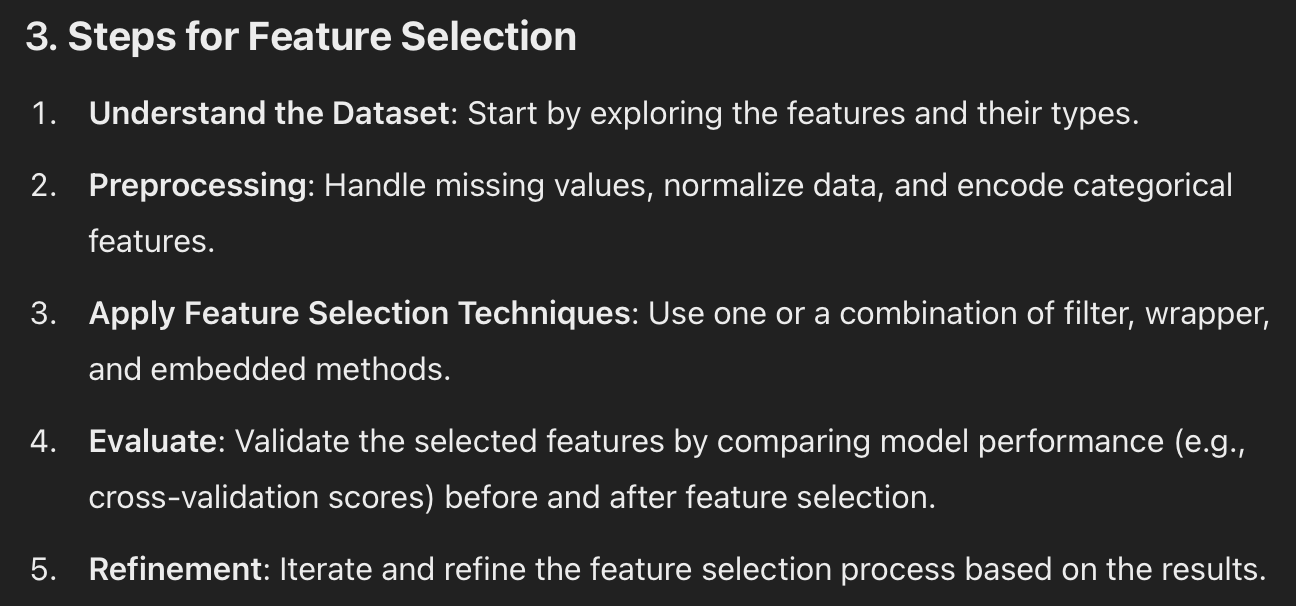

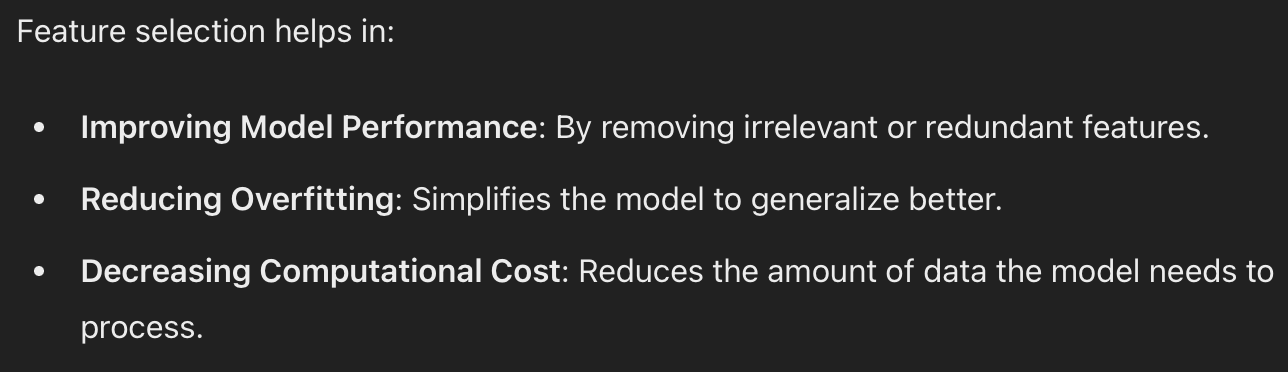

There are 3 general classes of feature selection algorithms: Filter methods, wrapper methods and embedded methods.

The role of feature selection in machine learning is:

1. To reduce the dimensionality of feature space.

2. To speed up a learning algorithm.

3. To improve the predictive accuracy of a classification algorithm.

4. To improve the comprehensibility of the learning results.

**Feature Selection Techniques:**
https://scikit-learn.org/stable/modules/feature_selection.html

https://www.geeksforgeeks.org/feature-selection-techniques-in-machine-learning/

https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

### A. Filter Methods
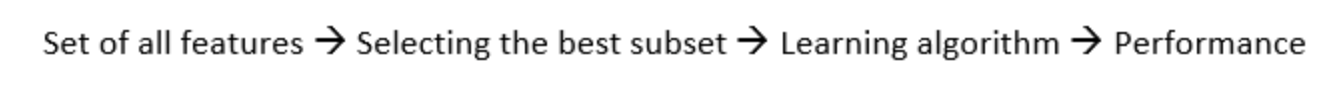
Use Statistical Tests: `ANOVA (Analysis of Variance)`
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # ANOVA F-value

print('Shape of X:', X.shape)
# k= # Number of top features to select
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X,y)
print('Shape of X_new:', X_new.shape)

## ----------------------------------------------

# Get the boolean mask indicating selected features
mask = selector.get_support()

# Get the names of the selected features
selected_features = X.columns[mask]

print('\nSelected features:', selected_features)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

# Fit SelectKBest
selector = SelectKBest(f_classif, k=20)
selector.fit(X, y)

# Get the scores of the selected features
scores = selector.scores_

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Sort the selected feature indices by their scores in descending order
sorted_indices = selected_indices[np.argsort(scores[selected_indices])[::-1]]

# Retrieve the feature names in order of importance
sorted_features = X.columns[sorted_indices]

print("Selected feature names in order of importance:")
print(sorted_features)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


# Step 1: Use SelectKBest to select top features
select_k_best = SelectKBest(f_classif, k=20)

# Step 2: Use RFE with RandomForestClassifier to further select features
model = RandomForestClassifier(n_estimators=50, random_state=seed, n_jobs=-1)  # reduced number of trees
rfe = RFE(model, n_features_to_select=10)

# Step 3: Create a pipeline to combine steps
pipeline = Pipeline([
    ('select_k_best', select_k_best),
    ('rfe', rfe)
])

# Fit the pipeline
pipeline.fit(X, y)

# Get the feature names selected by SelectKBest
selected_kbest_indices = pipeline.named_steps['select_k_best'].get_support(indices=True)
selected_kbest_features = X.columns[selected_kbest_indices]

# Create a new DataFrame with these selected features
X_selected_kbest = X[selected_kbest_features]

# Get the feature names selected by RFE
selected_rfe_features = X_selected_kbest.columns[pipeline.named_steps['rfe'].get_support(indices=True)]

# Print the selected features
print("Selected features after combining SelectKBest and RFE:")
print(selected_rfe_features)


In [ ]:
X_selected_kbest.shape

In [ ]:
## Make NEW X => X_reduced 
X_reduced = X[['V4', 'V7', 'V9', 'V10', 'V11', 
               'V12', 'V14', 'V16', 'V17', 'V21']]


In [ ]:
# Convert y_train_SMOTE to a DataFrame and name the column
#y_reduced = pd.DataFrame(y, columns=['Class'])

# Combine X_train_SMOTE with y_train_SMOTE
df_reduced = pd.concat([X_reduced.reset_index(drop=True), 
                            y.reset_index(drop=True)], axis=1)
# Compute the correlation matrix
corr = df_reduced.corr()
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap='coolwarm', annot=True);
plt.title('Correlation Matrix');

In [ ]:
# Fit Random Forest
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Fit XGBOOST
model = GradientBoostingClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## --------------------------------------------------------------------------------------

### Split the data into `training` and `test` set

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=seed)

In [25]:
print('Class Distribution (Training set)', y_train.value_counts())
print('\nClass Distribution (Test set)', y_test.value_counts())

Class Distribution (Training set) Class
0    198290
1       318
Name: count, dtype: int64

Class Distribution (Test set) Class
0    84963
1      155
Name: count, dtype: int64


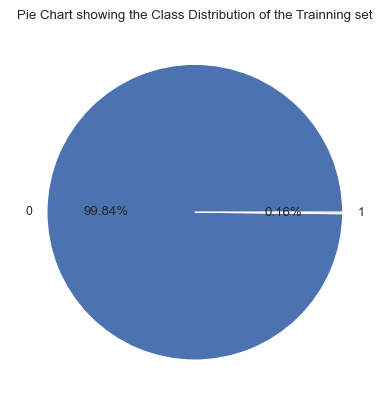

In [26]:
## Class Distribution (Trainning set)
class_counts = y_train.value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Pie Chart showing the Class Distribution of the Trainning set');

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/class_distribution_Trainset')


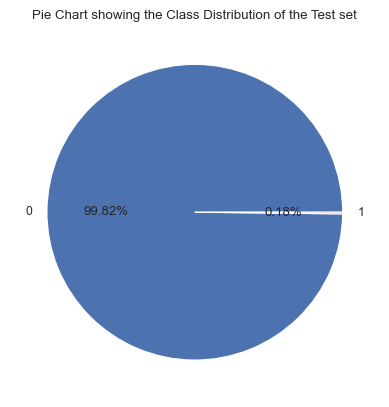

In [27]:
class_counts = y_test.value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Pie Chart showing the Class Distribution of the Test set');

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/class_distribution_Testset')


# Resampling

# `Pipeline` (combine Oversampling and Undersampling)
https://hersanyagci.medium.com/random-resampling-methods-for-imbalanced-data-with-imblearn-1fbba4a0e6d3

`RandomOverSampler(0.1)` : 0.1 * majority class

`RandomUnderSampler(0.5)` : 2 * minority class

In [28]:
OVER = RandomOverSampler(sampling_strategy=0.01, random_state=seed)
UNDER = RandomUnderSampler(sampling_strategy=0.05, random_state=seed)

steps = [('o', OVER), ('u', UNDER)]
pipeline = Pipeline(steps=steps)
X_train_COMBINE, y_train_COMBINE = pipeline.fit_resample(X_train, y_train)

In [29]:
print('Class Distribution (COMBINE)', y_train_COMBINE.value_counts())
print(X_train_COMBINE.shape, y_train_COMBINE.shape)

Class Distribution (COMBINE) Class
0    39640
1     1982
Name: count, dtype: int64
(41622, 30) (41622,)


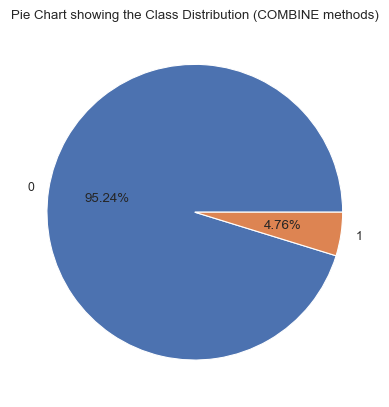

In [30]:
class_counts = y_train_COMBINE.value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Pie Chart showing the Class Distribution (COMBINE methods)');

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/class_distribution_COMBINE')


## 2. `RandomUnderSampler`

## Try Undersampling (50%, 50%, fast)

In [31]:
Under = RandomUnderSampler(random_state=seed)
X_train_Under, y_train_Under = Under.fit_resample(X_train, y_train)
print('Class Distribution (Training)', y_train_Under.value_counts())
print(X_train_Under.shape, y_train_Under.shape)

Class Distribution (Training) Class
0    318
1    318
Name: count, dtype: int64
(636, 30) (636,)


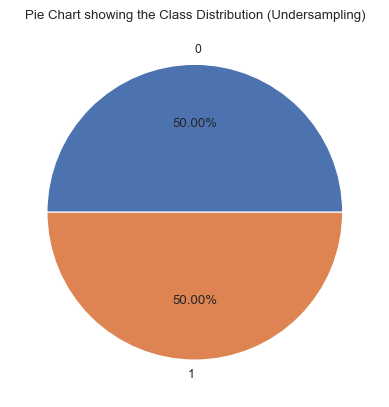

In [32]:
class_counts = y_train_Under.value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Pie Chart showing the Class Distribution (Undersampling)');

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/Undersampling')


## Dimensionality Reduction and Clustering (Visualization)
#### Try `t-SNE`, `PCA`, and `SVD` on training predictors (X_train_Under) 

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [33]:
## t-SNE Implementation (X_train_Under)
t0 = time.time()
X_embedded_TSNE = TSNE(n_components=2, 
                       random_state=seed).fit_transform(X_train_Under)
t1 = time.time()
print(f'T-SNE took: {round(t1-t0,2)} s')

## PCA Implementation (X_train_Under)
t0 = time.time()
X_embedded_PCA = PCA(n_components=2, 
                       random_state=seed).fit_transform(X_train_Under)
t1 = time.time()
print(f'PCA took: {round(t1-t0,4)} s')

## TruncatedSVD Implementation (X_train_Under)
t0 = time.time()
X_embedded_TruncatedSVD = TruncatedSVD(n_components=2, 
                       random_state=seed).fit_transform(X_train_Under)
t1 = time.time()
print(f'TruncatedSVD took: {round(t1-t0,4)} s')

T-SNE took: 1.93 s
PCA took: 0.0022 s
TruncatedSVD took: 0.0015 s


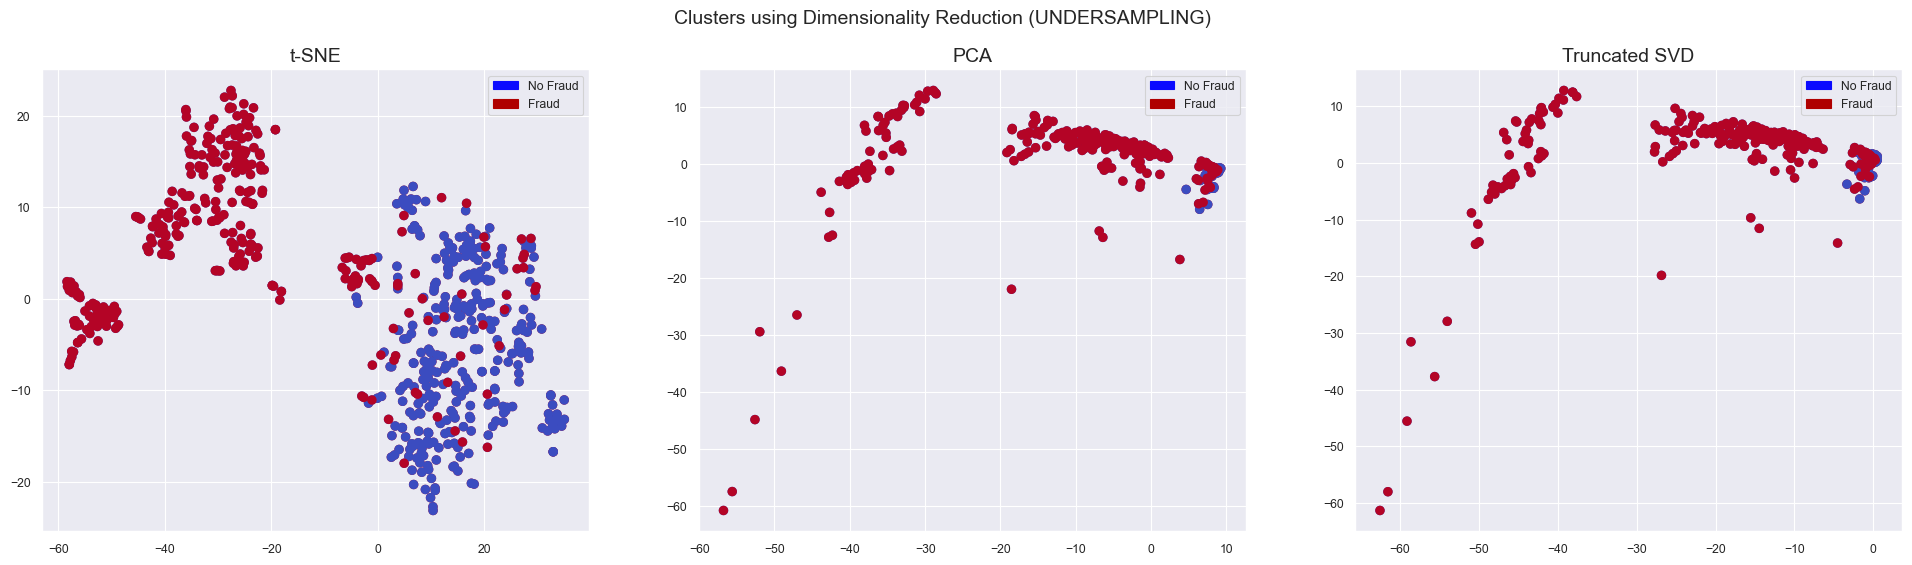

In [34]:
## VISUALIZATION

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction (UNDERSAMPLING)', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot ----------------------------------------
ax1.scatter(X_embedded_TSNE[:,0], X_embedded_TSNE[:,1], c=(y_train_Under == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_embedded_TSNE[:,0], X_embedded_TSNE[:,1], c=(y_train_Under == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot ----------------------------------------
ax2.scatter(X_embedded_PCA[:,0], X_embedded_PCA[:,1], c=(y_train_Under == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_embedded_PCA[:,0], X_embedded_PCA[:,1], c=(y_train_Under == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot -----------------------------------
ax3.scatter(X_embedded_TruncatedSVD[:,0], X_embedded_TruncatedSVD[:,1], c=(y_train_Under == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_embedded_TruncatedSVD[:,0], X_embedded_TruncatedSVD[:,1], c=(y_train_Under == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/Visualizatio_Undersampling')

plt.show()

#### Try `t-SNE`, `PCA`, and `SVD` on training predictors (X_train_COMBINE) 

In [35]:

## t-SNE Implementation (X_train_COMBINE)
t0 = time.time()
X_embedded_TSNE = TSNE(n_components=2, random_state=seed).fit_transform(X_train_COMBINE)
t1 = time.time()
print(f'T-SNE took: {round(t1-t0,2)} s')

## PCA Implementation (X_train_COMBINE)
t0 = time.time()
X_embedded_PCA = PCA(n_components=2, 
                       random_state=seed).fit_transform(X_train_COMBINE)
t1 = time.time()
print(f'PCA took: {round(t1-t0,4)} s')

## TruncatedSVD Implementation (X_train_COMBINE)
t0 = time.time()
X_embedded_TruncatedSVD = TruncatedSVD(n_components=2, 
                       random_state=seed).fit_transform(X_train_COMBINE)
t1 = time.time()
print(f'TruncatedSVD took: {round(t1-t0,4)} s')

T-SNE took: 94.98 s
PCA took: 0.0257 s
TruncatedSVD took: 0.1491 s


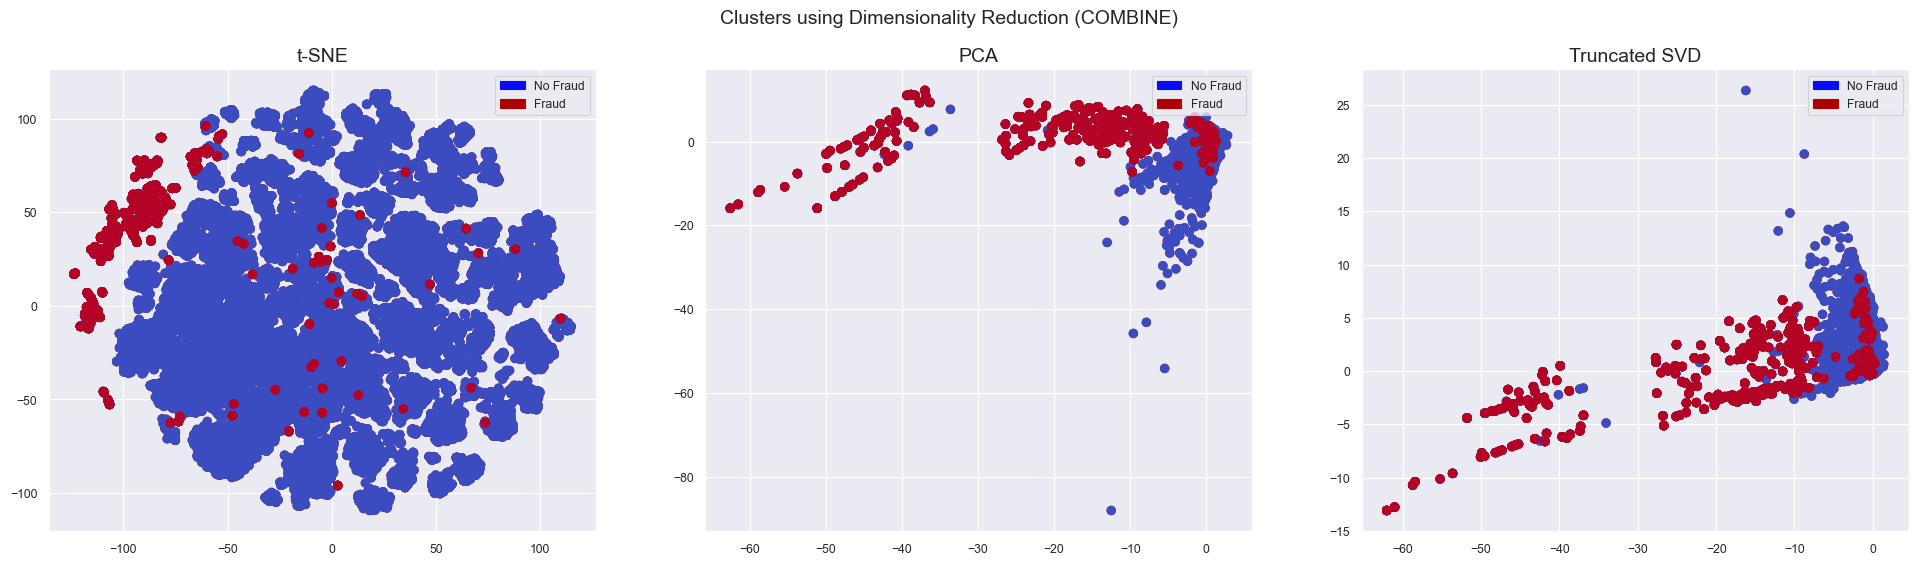

In [36]:
## VISUALIZATION

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction (COMBINE)', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot ----------------------------------------
ax1.scatter(X_embedded_TSNE[:,0], X_embedded_TSNE[:,1], c=(y_train_COMBINE == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_embedded_TSNE[:,0], X_embedded_TSNE[:,1], c=(y_train_COMBINE == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot ----------------------------------------
ax2.scatter(X_embedded_PCA[:,0], X_embedded_PCA[:,1], c=(y_train_COMBINE == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_embedded_PCA[:,0], X_embedded_PCA[:,1], c=(y_train_COMBINE == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot -----------------------------------
ax3.scatter(X_embedded_TruncatedSVD[:,0], X_embedded_TruncatedSVD[:,1], c=(y_train_COMBINE == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_embedded_TruncatedSVD[:,0], X_embedded_TruncatedSVD[:,1], c=(y_train_COMBINE == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/Visualizatio_COMBINE')

plt.show()

#### Try `t-SNE`, `PCA`, and `SVD` on training predictors (X_train) 

In [37]:

## t-SNE Implementation (X_train)
#t0 = time.time()
#X_embedded_TSNE = TSNE(n_components=2, random_state=seed).fit_transform(X_train)
#t1 = time.time()
#print(f'T-SNE took: {round(t1-t0,2)} s')

## PCA Implementation (X_train)
t0 = time.time()
X_embedded_PCA = PCA(n_components=2, 
                       random_state=seed).fit_transform(X_train)
t1 = time.time()
print(f'PCA took: {round(t1-t0,4)} s')

## TruncatedSVD Implementation (X_train)
t0 = time.time()
X_embedded_TruncatedSVD = TruncatedSVD(n_components=2, 
                       random_state=seed).fit_transform(X_train)
t1 = time.time()
print(f'TruncatedSVD took: {round(t1-t0,4)} s')

PCA took: 0.0556 s
TruncatedSVD took: 0.3531 s


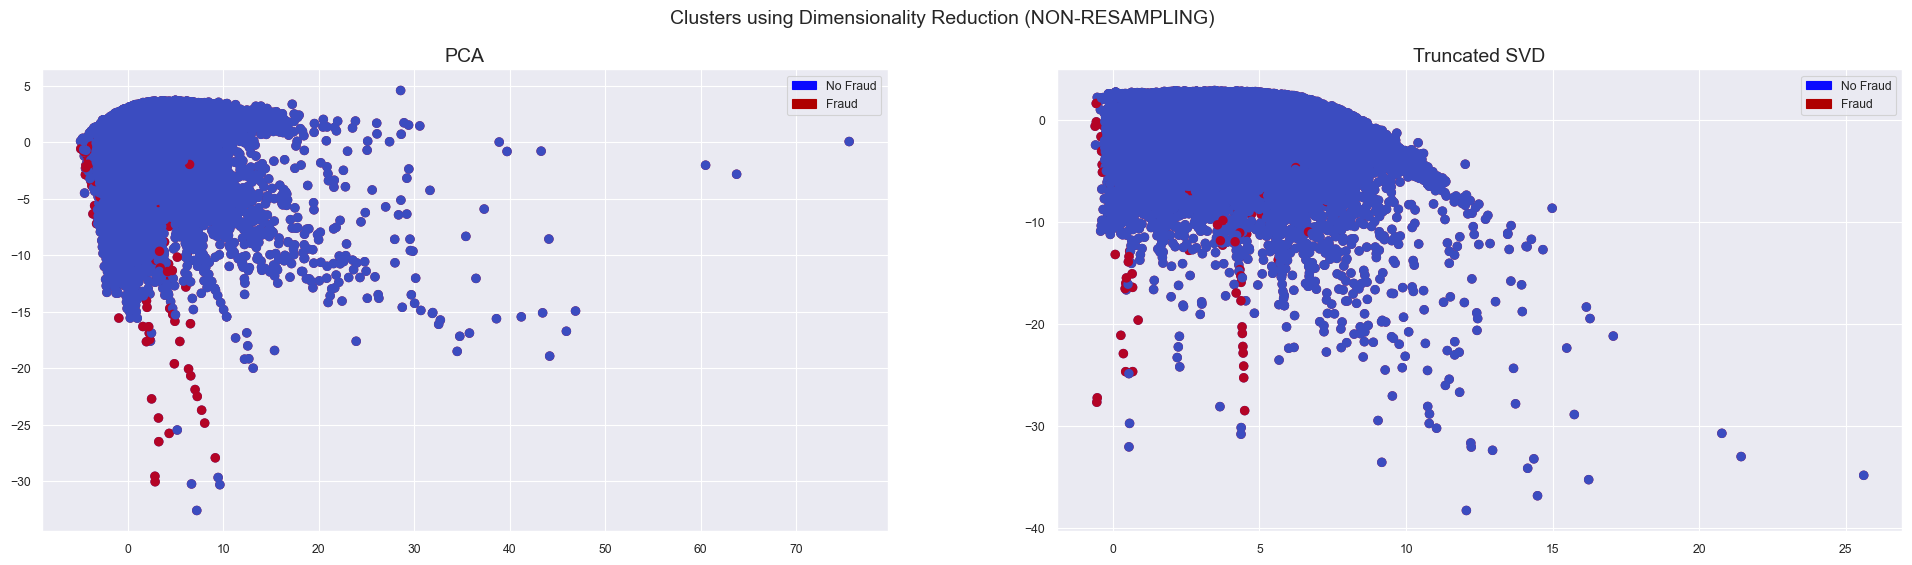

In [38]:

## VISUALIZATION

#f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction (NON-RESAMPLING)', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot ----------------------------------------
#ax1.scatter(X_embedded_TSNE[:,0], X_embedded_TSNE[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
#ax1.scatter(X_embedded_TSNE[:,0], X_embedded_TSNE[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
#ax1.set_title('t-SNE', fontsize=14)

#ax1.grid(True)

#ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot ----------------------------------------
ax2.scatter(X_embedded_PCA[:,0], X_embedded_PCA[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_embedded_PCA[:,0], X_embedded_PCA[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot -----------------------------------
ax3.scatter(X_embedded_TruncatedSVD[:,0], X_embedded_TruncatedSVD[:,1], c=(y_train == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_embedded_TruncatedSVD[:,0], X_embedded_TruncatedSVD[:,1], c=(y_train == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/Visualizatio_NONRESAMPLING')

plt.show()

## -------------------------------------------------------------------

## MODELING

### Learning Curve (NON-Resampling)
Really bad

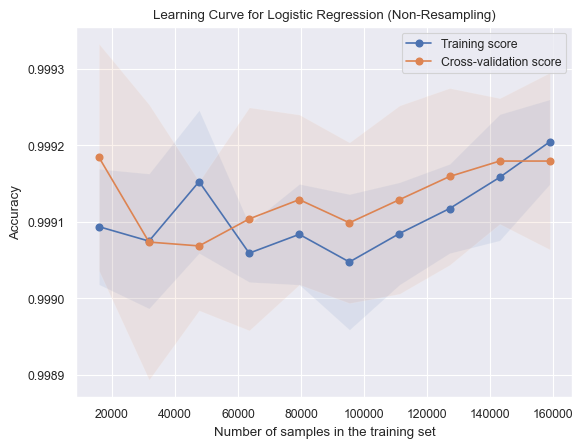

In [39]:
# Define model
model_LR = LogisticRegression()

# kf
kf = KFold(n_splits=5, random_state=seed)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(model_LR, 
                                                        X_train, 
                                                        y_train, 
                                                        cv=kf, 
                                                        scoring='accuracy', 
                                                        n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))
# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
#plt.figure()
plt.title("Learning Curve for Logistic Regression (Non-Resampling)")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Accuracy")

# Plot the average training and cross-validation score with standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")

plt.legend(loc="best")

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/learningCurve_NON_SAMPLING')


plt.show()

### Learning Curves for `LogisticRegression` (Undersampling)

https://medium.com/@alexstrebeck/training-and-testing-machine-learning-models-e1f27dc9b3cb

/Users/vydao/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
23 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vydao/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vydao/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/vydao/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.p

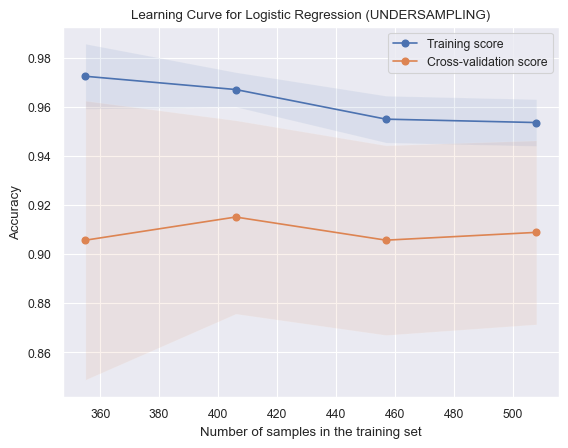

In [40]:

# Define model
model_LR = LogisticRegression()

# kf
kf = KFold(n_splits=5, random_state=seed)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(model_LR, 
                                                        X_train_Under, 
                                                        y_train_Under, 
                                                        cv=kf, 
                                                        scoring='accuracy', 
                                                        n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))
# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
#plt.figure()
plt.title("Learning Curve for Logistic Regression (UNDERSAMPLING)")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Accuracy")

# Plot the average training and cross-validation score with standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")

plt.legend(loc="best")

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/learningCurve_UNDERSAMPLING')

plt.show()

**Interpret:**

- The **training score (blue line)** starts high and slightly decreases as the number of training samples increases. This suggests that the model is performing very well on the training data and has high accuracy.
- The **cross-validation score (orange line)** is lower than the training score and remains relatively stable => This indicates that while the model performs well on the training data, it is not performing as well on unseen data (validation set).
- There is a **noticeable gap between the training and cross-validation scores**. This gap suggests that the model might be overfitting the training data, meaning it captures noise in the training data rather than the underlying patterns.

**Actions based on Learning Curve Analysis:**
1. **Regularization:** Increase the regularization parameter C to reduce overfitting. This will penalize complex models and help the model generalize better.
2. **More Training data:** More data can help the model learn better patterns and reduce overfitting.
3. **Hyperparameter Tuning:** Perform more extensive hyperparameter tuning using techniques like `RandomizedSearchCV` or `GridSearchCV` to find the best set of parameters for your model.
4. **Cross-Validation**
5. **Ensemble Methods:** Try more different models

### Learning Curve (COMBINE)

/Users/vydao/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
46 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
46 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vydao/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vydao/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/vydao/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.p

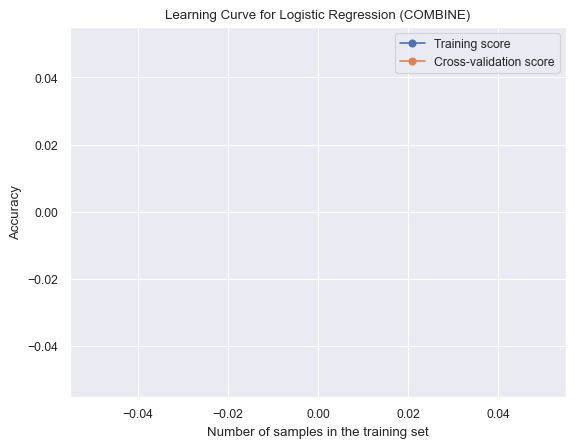

In [41]:

# Define model
model_LR = LogisticRegression()

# kf
kf = KFold(n_splits=5, random_state=seed)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(model_LR, 
                                                        X_train_COMBINE, 
                                                        y_train_COMBINE, 
                                                        cv=kf, 
                                                        scoring='accuracy', 
                                                        n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))
# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
#plt.figure()
plt.title("Learning Curve for Logistic Regression (COMBINE)")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Accuracy")

# Plot the average training and cross-validation score with standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")

plt.legend(loc="best")

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/learningCurve_COMBINE')

plt.show()

### Choose Models

https://medium.com/@alexstrebeck/training-and-testing-machine-learning-models-e1f27dc9b3cb

There are many ways to go about this, however a rather simple and good first pass attempt is to just train a few different models on the same data and see what score they each achieve “out of the box”.

As we will see later, we can take the top two best performing models and tune them each individually to get even better results. 

In order to score each of the model we will be using a indicator called **Area under the Curve**. 

1. Logistic Regression
2. K-Nearest Neighbour (KNN)
3. Decision Tree Classifier
4. Random Forest
5. XGBoost
6. Support Vector Machine (SVM)
7. Naive Bayes

### UnderSampling (Choose Models)

In [42]:
# Dictionary to store the results
results = {}

### 1. LOGISTIC REGRESSION

model = LogisticRegression()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_Under, y_train_Under, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Logistic Regression): ", scores.mean())

results['1.LR'] = scores.mean()

Mean AUC Score (Logistic Regression):  0.9722276475694445


In [43]:
### 2. K-NEAREST-NEIGHBOUR (KNN)

model = KNeighborsClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_Under, y_train_Under, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (K-Nearest Neighbour): ", scores.mean())

results['2.KNN'] = scores.mean()

Mean AUC Score (K-Nearest Neighbour):  0.9670979817708334


In [44]:
### 3. DECISION TREE CLASSIFIER

model = DecisionTreeClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_Under, y_train_Under, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Decision Tree): ", scores.mean())

results['3.DT'] = scores.mean()

Mean AUC Score (Decision Tree):  0.9105406746031747


In [45]:
### 4. RANDOM FOREST

model = RandomForestClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_Under, y_train_Under, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Random Forest): ", scores.mean())

results['4.RF'] = scores.mean()

Mean AUC Score (Random Forest):  0.9742621527777778


In [46]:
### 5. XGBOOST

model = GradientBoostingClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_Under, y_train_Under, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (XGBoost): ", scores.mean())

results['5.XGB'] = scores.mean()

Mean AUC Score (XGBoost):  0.9771120101686508


In [47]:
### 6. SUPPORT VECTOR MACHINE (SVM)

model = SVC()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_Under, y_train_Under, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Support Vector Machine): ", scores.mean())

results['6.SVM'] = scores.mean()

Mean AUC Score (Support Vector Machine):  0.981982421875


In [48]:
### 7. NAIVE BAYES

model = GaussianNB()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_Under, y_train_Under, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Gaussian Naive Bayes): ", scores.mean())

results['7.NB'] = scores.mean()

Mean AUC Score (Gaussian Naive Bayes):  0.9592130146329365


In [49]:
# Create DataFrame from results
df_chooseModels = pd.DataFrame(list(results.items()), columns=['Model', 'Mean AUC Score'])

# Sort DataFrame by Mean AUC Score in descending order
df_chooseModels = df_chooseModels.sort_values(by='Mean AUC Score', ascending=False)

display(df_chooseModels)

,Model,Mean AUC Score
5,6.SVM,0.981982
4,5.XGB,0.977112
3,4.RF,0.974262
0,1.LR,0.972228
1,2.KNN,0.967098
6,7.NB,0.959213
2,3.DT,0.910541


**Results:**
From the 7 scores above the top 4 performers were:
- SVM
- RF
- LR
- XGB

We will move ahead and fine tune them.

### Non-Resampling (Choose Models)

In [50]:
# Dictionary to store the results
results_non = {}

### 1. LOGISTIC REGRESSION

model = LogisticRegression()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train, y_train, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Logistic Regression) on Non-Resampling: ", scores.mean())

results_non['1.LR'] = scores.mean()

Mean AUC Score (Logistic Regression) on Non-Resampling:  0.9694376439890429


In [51]:
### 2. K-NEAREST-NEIGHBOUR (KNN)

model = KNeighborsClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train, y_train, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (K-Nearest Neighbour): ", scores.mean())

results_non['2.KNN'] = scores.mean()

Mean AUC Score (K-Nearest Neighbour):  0.9117722630924965


In [52]:
### 3. DECISION TREE CLASSIFIER

model = DecisionTreeClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train, y_train, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Decision Tree): ", scores.mean())

results_non['3.DT'] = scores.mean()

Mean AUC Score (Decision Tree):  0.8473450256638706


In [53]:
### 4. RANDOM FOREST

model = RandomForestClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train, y_train, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Random Forest): ", scores.mean())

results_non['4.RF'] = scores.mean()

Mean AUC Score (Random Forest):  0.9494793367718597


In [54]:
### 5. XGBOOST

model = GradientBoostingClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train, y_train, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (XGBoost): ", scores.mean())

results_non['5.XGB'] = scores.mean()

KeyboardInterrupt: 

In [ ]:
### 6. SUPPORT VECTOR MACHINE (SVM)

model = SVC()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train, y_train, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Support Vector Machine): ", scores.mean())

results_non['6.SVM'] = scores.mean()

In [ ]:
### 7. NAIVE BAYES

model = GaussianNB()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train, y_train, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Gaussian Naive Bayes): ", scores.mean())

results_non['7.NB'] = scores.mean()

In [ ]:
# Create DataFrame from results
df_chooseModels_non = pd.DataFrame(list(results_non.items()), columns=['Model', 'Mean AUC Score'])

# Sort DataFrame by Mean AUC Score in descending order
df_chooseModels_non = df_chooseModels_non.sort_values(by='Mean AUC Score', ascending=False)

display(df_chooseModels_non)

For Non-Resampling dataset, from the 7 scores above, the top 4 performers are: `LR, NB, SVM, RF`. We will move ahead and fine tune them.

### Combine Resampling (Choose Models)

In [ ]:
# Dictionary to store the results
results_COMBINE = {}

### 1. LOGISTIC REGRESSION

model = LogisticRegression()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_COMBINE, y_train_COMBINE, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Logistic Regression) on Non-Resampling: ", scores.mean())

results_COMBINE['1.LR'] = scores.mean()

In [ ]:
### 2. K-NEAREST-NEIGHBOUR (KNN)

model = KNeighborsClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_COMBINE, y_train_COMBINE, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (K-Nearest Neighbour): ", scores.mean())

results_COMBINE['2.KNN'] = scores.mean()

In [ ]:
### 3. DECISION TREE CLASSIFIER

model = DecisionTreeClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_COMBINE, y_train_COMBINE, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Decision Tree): ", scores.mean())

results_COMBINE['3.DT'] = scores.mean()

In [ ]:
### 4. RANDOM FOREST

model = RandomForestClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_COMBINE, y_train_COMBINE, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Random Forest): ", scores.mean())

results_COMBINE['4.RF'] = scores.mean()

In [ ]:
### 5. XGBOOST

model = GradientBoostingClassifier()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_COMBINE, y_train_COMBINE, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (XGBoost): ", scores.mean())

results_COMBINE['5.XGB'] = scores.mean()

In [ ]:
### 6. SUPPORT VECTOR MACHINE (SVM)

model = SVC()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_COMBINE, y_train_COMBINE, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Support Vector Machine): ", scores.mean())

results_COMBINE['6.SVM'] = scores.mean()

In [ ]:
### 7. NAIVE BAYES

model = GaussianNB()
kf = StratifiedKFold(n_splits=5, random_state=seed)
scores = cross_val_score(model, X_train_COMBINE, y_train_COMBINE, 
                         cv=kf, scoring='roc_auc')
print("Mean AUC Score (Gaussian Naive Bayes): ", scores.mean())

results_COMBINE['7.NB'] = scores.mean()

In [ ]:
# Create DataFrame from results
df_chooseModels_COMBINE = pd.DataFrame(list(results_COMBINE.items()), columns=['Model', 'Mean AUC Score'])

# Sort DataFrame by Mean AUC Score in descending order
df_chooseModels_COMBINE = df_chooseModels_COMBINE.sort_values(by='Mean AUC Score', ascending=False)

display(df_chooseModels_COMBINE)

### Using `GridSearchCV` for exploring hyper parameters
This whole time we have been evaluating our models based on some measure called the **Area Under the Curve (AUC)**, but what is it?

Answer in Compute AUC for a set of results (link): 
https://medium.com/@alexstrebeck/training-and-testing-machine-learning-models-e1f27dc9b3cb

- True Positive Rate (TPR) / Sensitivity: This is plotted on the y-axis. It measures the proportion of actual positives correctly identified by the model.
- False Positive Rate (FPR): This is plotted on the x-axis. It measures the proportion of actual negatives that are incorrectly identified as positives by the model.
- Curve Shape: The ROC curve starts at (0, 0) and ends at (1, 1).

The more area that we have under the curve, the better the model was at predicting classes and thus we have a higher rate of true positives while holding the number of false positives at a much lower rate. The big take away here is that a bigger AUC score will generally correspond to a better model.

### Undersampling

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

### 6. SVM -------------------------------------------------
tuned_parameters = {
    'C': [0.1, 1, 10, 100],
    'probability': [True]
}

clf_SVM = GridSearchCV(SVC(), tuned_parameters, 
                       cv=kf, scoring= 'roc_auc')

clf_SVM.fit(X_train_Under, y_train_Under)

print('Best parameters:', clf_SVM.best_params_)
print("\nOptimized trainning model achieved an ROC of (SVM): ", 
      round(clf_SVM.score(X_train_Under, y_train_Under), 4))

Best parameters: {'C': 1, 'probability': True}

Optimized trainning model achieved an ROC of (SVM):  0.9877


**ROC Curve Interpretation:**
- The SVM model with the optimized parameters (C=1 and probability=True) performs very well, as indicated by the high AUC score of 0.9864.
- The ROC curve supports this by showing that the model has a strong ability to differentiate between the positive and negative classes, with most of the curve being close to the top-left corner.

In [56]:
### 4. RANDOM FOREST (RF)
tuned_parameters = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

clf_RF = GridSearchCV(RandomForestClassifier(), tuned_parameters, 
                   cv=kf, scoring= 'roc_auc')

clf_RF.fit(X_train_Under, y_train_Under)

print('Best parameters:', clf_RF.best_params_)

# Training ROC AUC
print(f"\nTraining ROC AUC of (RANDOM FOREST): {clf_RF.score(X_train_Under, y_train_Under)}")


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Training ROC AUC of (RANDOM FOREST): 1.0


In [ ]:
### 1. LOGISTIC REGRESSION
param_grid_LR = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1], # Inverse of regularization strength
    'solver': ['liblinear'],
    'max_iter': [100, 200, 500]
}
clf_LR = GridSearchCV(LogisticRegression(), param_grid_LR,
                     cv=kf, scoring='roc_auc')
clf_LR.fit(X_train_Under, y_train_Under)

print('Best parameters:', clf_LR.best_params_)

# Training ROC AUC
print(f"\nTraining ROC AUC of (LOGISTIC REGRESSION): {clf_LR.score(X_train_Under, y_train_Under)}")


In [57]:
### 1. XGBOOST
param_grid_XGB = {}
clf_XGB = GridSearchCV(GradientBoostingClassifier(), param_grid_XGB,
                     cv=kf, scoring='roc_auc')
clf_XGB.fit(X_train_Under, y_train_Under)

print('Best parameters:', clf_XGB.best_params_)

# Training ROC AUC
print(f"\nTraining ROC AUC of (XGB): {clf_XGB.score(X_train_Under, y_train_Under)}")


Best parameters: {}

Training ROC AUC of (XGB): 1.0


### NON-RESAMPLING 

In [59]:
### 1. LOGISTIC REGRESSION
param_grid_LR = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1], # Inverse of regularization strength
    'solver': ['liblinear'],
    'max_iter': [100, 200, 500]
}
clf_LR = GridSearchCV(LogisticRegression(), param_grid_LR,
                     cv=kf, scoring='roc_auc')
clf_LR.fit(X_train, y_train)

print('Best parameters:', clf_LR.best_params_)

# Training ROC AUC
print(f"\nTraining ROC of (LR) on NON-RESAMPLING: {clf_LR.score(X_train, y_train)}")


Best parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Training ROC of (LR) on NON-RESAMPLING: 0.9788856515661738


In [78]:
### GaussianNB
param_grid_NB = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}
clf_NB = GridSearchCV(GaussianNB(), param_grid_NB,
                     cv=kf, scoring='roc_auc')
clf_NB.fit(X_train, y_train)

print('Best parameters:', clf_NB.best_params_)

# Training ROC AUC
print(f"\nTraining ROC of (NB) on NON-RESAMPLING: {clf_NB.score(X_train, y_train)}")


Best parameters: {'var_smoothing': 0.001}

Training ROC of (NB) on NON-RESAMPLING: 0.9592667384756016


In [ ]:
### SVM
param_grid_SVM = {
    'C': [0.1, 1, 10, 100]
}
clf_SVM = GridSearchCV(SVC(), param_grid_SVM,
                     cv=kf, scoring='roc_auc')
clf_SVM.fit(X_train, y_train)

print('Best parameters:', clf_SVM.best_params_)

# Training ROC AUC
print(f"\nTraining ROC of (SVM) on NON-RESAMPLING: {clf_SVM.score(X_train, y_train)}")


### COMBINE 

In [62]:
### 4. RANDOM FOREST (RF)
tuned_parameters = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

clf_RF = GridSearchCV(RandomForestClassifier(), tuned_parameters, 
                   cv=kf, scoring= 'roc_auc')

clf_RF.fit(X_train_COMBINE, y_train_COMBINE)

print('Best parameters:', clf_RF.best_params_)

# Training ROC AUC
print(f"\nTraining ROC AUC of (RANDOM FOREST) on COMBINE: {clf_RF.score(X_train_COMBINE, y_train_COMBINE)}")


KeyboardInterrupt: 

In [80]:
### KNN
tuned_parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

clf_KNN = GridSearchCV(KNeighborsClassifier(), tuned_parameters, 
                   cv=kf, scoring= 'roc_auc')

clf_KNN.fit(X_train_COMBINE, y_train_COMBINE)

print('Best parameters:', clf_KNN.best_params_)

# Training ROC AUC
print(f"\nTraining ROC AUC of (KNN) on COMBINE: {clf_KNN.score(X_train_COMBINE, y_train_COMBINE)}")


Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

Training ROC AUC of (KNN) on COMBINE: 1.0


In [ ]:
### DT
tuned_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

clf_DT = GridSearchCV(, tuned_parameters, 
                   cv=kf, scoring= 'roc_auc')

clf_DT.fit(X_train_COMBINE, y_train_COMBINE)

print('Best parameters:', clf_DT.best_params_)

# Training ROC AUC
print(f"\nTraining ROC AUC of (DT) on COMBINE: {clf_DT.score(X_train_COMBINE, y_train_COMBINE)}")


## Evaluate on Test Data

### UNDERSAMPLING

SVM Test AUC: 0.9831
---------------------------

Accuracy: 0.9815
Precision: 0.0808
Recall: 0.8839
F1 Score: 0.1480
ROC-AUC: 0.9831
MCC: 0.2641

False Positive Rate: 0.0101
False Negative Rate: 0.1387
True Positive Rate (sensitivity/recall): 0.8613
True Negative Rate (specificity): 0.9899
---------------------------
Confusion Matrix:
[[83404  1559]
 [   18   137]]


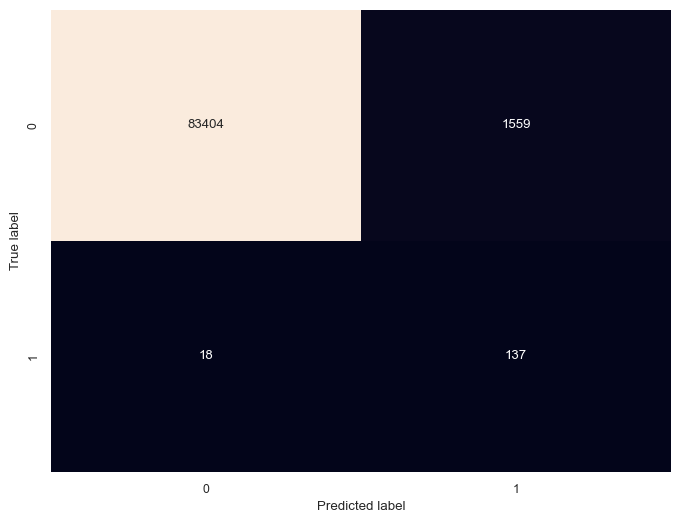

---------------------------


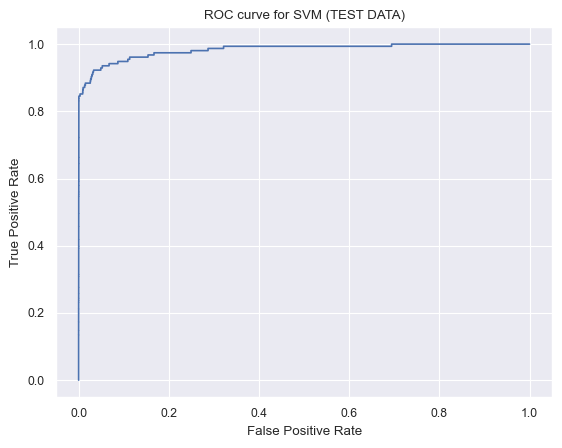

In [64]:

## 6. SVM ----------------------------------------------
svm_model = SVC(C=1, probability=True) # best hyperparameters
svm_model.fit(X_train_Under, y_train_Under) 

y_pred_svm = svm_model.predict(X_test) 
print("SVM Test AUC:", round(roc_auc_score(y_test, 
                                     svm_model.predict_proba(X_test)[:, 1]),4))

## Classification Report --------------------------------------
print('---------------------------')

print(f'\nAccuracy: {accuracy_score(y_test, y_pred_svm):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_svm):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_svm):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred_svm):.4f}')
print(f'ROC-AUC: {roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1]):.4f}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred_svm):.4f}')

print(f'\nFalse Positive Rate: {((860)/(860+84121)):.4f}')
print(f'False Negative Rate: {((19)/(19+118)):.4f}')
print(f'True Positive Rate (sensitivity/recall): {((118)/(19+118)):.4f}') #sensitivity
print(f'True Negative Rate (specificity): {((84121)/(84121+860)):.4f}') #specificity

## Confusion Matrix ------------------------------------------
print('---------------------------')

conf_matrix = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:')
print(conf_matrix)

# Plotting the confusion matrix without color
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print('---------------------------')
## Plot ROC curve ---------------------------------------------
# Predict probabilities
proba = svm_model.predict_proba(X_test)
# Producing the same false/true positive data via a library and plotting it
fpr, tpr, _ = metrics.roc_curve(y_test, proba[:,1])

# Plotting the ROC curve
plt.plot(fpr,tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for SVM (TEST DATA)");

Random Forest Test AUC: 0.9791
---------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84963
           1       0.06      0.90      0.11       155

    accuracy                           0.97     85118
   macro avg       0.53      0.94      0.55     85118
weighted avg       1.00      0.97      0.98     85118



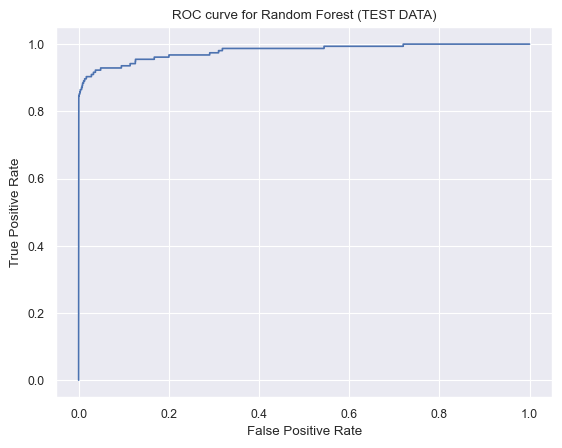

In [65]:
## 4. RANDOM FOREST (RF) ------------------------------------

# Train the model with the best hyperparameters found
RF_model = RandomForestClassifier(criterion='entropy', max_depth=10,
                                 max_features='sqrt', min_samples_leaf=2,
                                 min_samples_split=2, n_estimators=100)
RF_model.fit(X_train_Under, y_train_Under)

# Predict on the test data
y_pred_RF = RF_model.predict(X_test)

# Calculate and print the ROC AUC score on the test data
print("Random Forest Test AUC:", round(roc_auc_score(y_test, RF_model.predict_proba(X_test)[:, 1]), 4))

# Print classification report for the test data ----------------
print('---------------------------')
print(classification_report(y_test, y_pred_RF))

# Plot ROC curve ----------------------------------------------
# Predict probabilities for the test data
proba_RF = RF_model.predict_proba(X_test)
# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_RF, tpr_RF, _RF = metrics.roc_curve(y_test, proba_RF[:, 1])

# Plotting the ROC curve
plt.plot(fpr_RF, tpr_RF)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for Random Forest (TEST DATA)")
plt.show()

XGBoosting Test AUC: 0.981
---------------------------
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     84963
           1       0.03      0.92      0.06       155

    accuracy                           0.95     85118
   macro avg       0.52      0.94      0.52     85118
weighted avg       1.00      0.95      0.97     85118



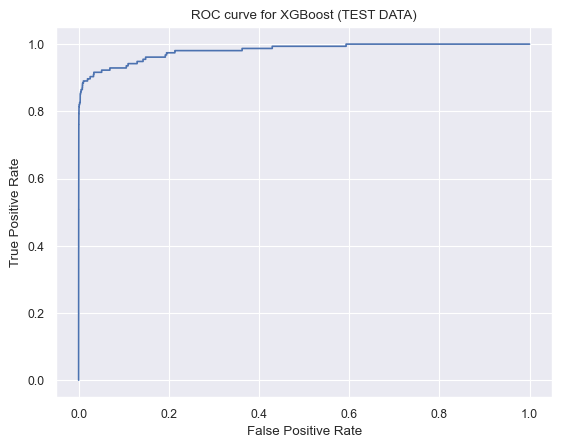

In [66]:
## 5. XGBOOST ------------------------------------

# Train the model with the best hyperparameters found
XGB_model = GradientBoostingClassifier()
XGB_model.fit(X_train_Under, y_train_Under)

# Predict on the test data
y_pred_XGB = XGB_model.predict(X_test)

# Calculate and print the ROC AUC score on the test data
print("XGBoosting Test AUC:", round(roc_auc_score(y_test, XGB_model.predict_proba(X_test)[:, 1]), 4))

# Print classification report for the test data ----------------
print('---------------------------')
print(classification_report(y_test, y_pred_XGB))

# Plot ROC curve ----------------------------------------------
# Predict probabilities for the test data
proba_XGB = XGB_model.predict_proba(X_test)
# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_XGB, tpr_XGB, _XGB = metrics.roc_curve(y_test, proba_XGB[:, 1])

# Plotting the ROC curve
plt.plot(fpr_XGB, tpr_XGB)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for XGBoost (TEST DATA)")
plt.show()

### NON-RESAMPLING

LR Test AUC (NON-RESAMPLING): 0.9747
---------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84963
           1       0.88      0.66      0.75       155

    accuracy                           1.00     85118
   macro avg       0.94      0.83      0.88     85118
weighted avg       1.00      1.00      1.00     85118



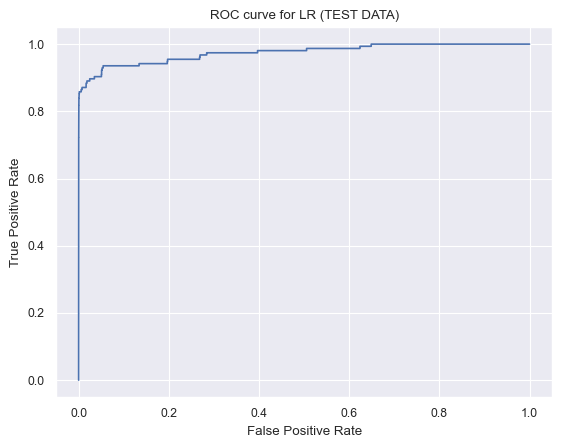

In [69]:
## 5. LR ------------------------------------

# Train the model with the best hyperparameters found
LR_model_NON = LogisticRegression(C=0.1, max_iter=100,
                                 penalty='l1', solver='liblinear')
LR_model_NON.fit(X_train, y_train)

# Predict on the test data
y_pred_LR_NON = LR_model_NON.predict(X_test)

# Calculate and print the ROC AUC score on the test data
print("LR Test AUC (NON-RESAMPLING):", round(roc_auc_score(y_test, LR_model_NON.predict_proba(X_test)[:, 1]), 4))

# Print classification report for the test data ----------------
print('---------------------------')
print(classification_report(y_test, y_pred_LR_NON))

# Plot ROC curve ----------------------------------------------
# Predict probabilities for the test data
proba_LR = LR_model_NON.predict_proba(X_test)
# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_LR, tpr_LR, _LR = metrics.roc_curve(y_test, proba_LR[:, 1])

# Plotting the ROC curve
plt.plot(fpr_LR, tpr_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for LR (TEST DATA)")
plt.show()

NB Test AUC (NON-RESAMPLING): 0.9644
---------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84963
           1       0.07      0.86      0.12       155

    accuracy                           0.98     85118
   macro avg       0.53      0.92      0.56     85118
weighted avg       1.00      0.98      0.99     85118



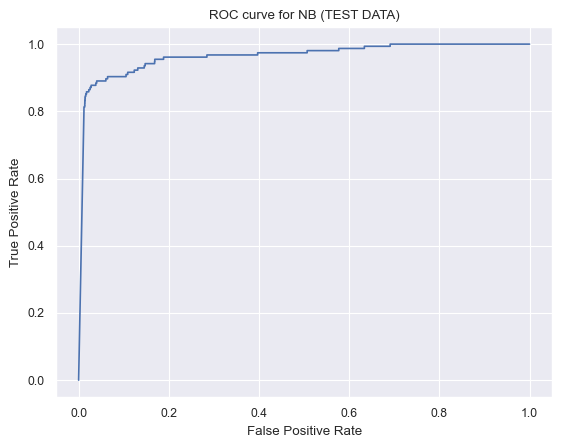

In [70]:
## NB ------------------------------------

# Train the model with the best hyperparameters found
NB_model_NON = GaussianNB(var_smoothing=0.001)
NB_model_NON.fit(X_train, y_train)

# Predict on the test data
y_pred_NB_NON = NB_model_NON.predict(X_test)

# Calculate and print the ROC AUC score on the test data
print("NB Test AUC (NON-RESAMPLING):", round(roc_auc_score(y_test, NB_model_NON.predict_proba(X_test)[:, 1]), 4))

# Print classification report for the test data ----------------
print('---------------------------')
print(classification_report(y_test, y_pred_NB_NON))

# Plot ROC curve ----------------------------------------------
# Predict probabilities for the test data
proba_NB = NB_model_NON.predict_proba(X_test)
# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_NB, tpr_NB, _NB = metrics.roc_curve(y_test, proba_NB[:, 1])

# Plotting the ROC curve
plt.plot(fpr_NB, tpr_NB)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for NB (TEST DATA)")
plt.show()

SVM Test AUC (NON-RESAMPLING): 0.9609
---------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84963
           1       0.90      0.76      0.83       155

    accuracy                           1.00     85118
   macro avg       0.95      0.88      0.91     85118
weighted avg       1.00      1.00      1.00     85118



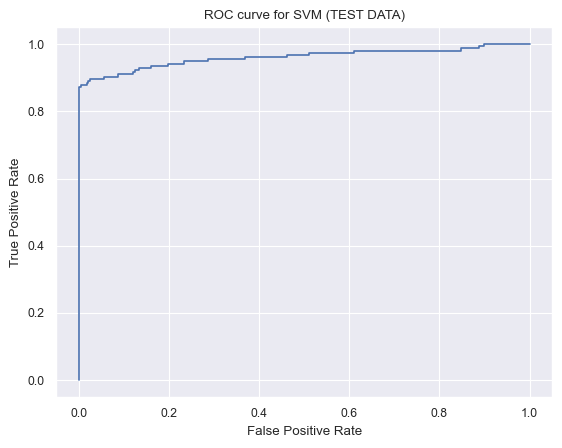

In [76]:
## SVM ------------------------------------

# Train the model with the best hyperparameters found
SVM_model_NON = SVC(C=100, probability=True)
SVM_model_NON.fit(X_train, y_train)

# Predict on the test data
y_pred_SVM_NON = SVM_model_NON.predict(X_test)

# Calculate and print the ROC AUC score on the test data
print("SVM Test AUC (NON-RESAMPLING):", round(roc_auc_score(y_test, SVM_model_NON.predict_proba(X_test)[:, 1]), 4))

# Print classification report for the test data ----------------
print('---------------------------')
print(classification_report(y_test, y_pred_SVM_NON))

# Plot ROC curve ----------------------------------------------
# Predict probabilities for the test data
proba_SVM = SVM_model_NON.predict_proba(X_test)
# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_SVM, tpr_SVM, _SVM = metrics.roc_curve(y_test, proba_SVM[:, 1])

# Plotting the ROC curve
plt.plot(fpr_SVM, tpr_SVM)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for SVM (TEST DATA)")
plt.show()

### COMBINE RESAMPLING

Random Forest Test AUC (COMBINE RESAMPLING): 0.9649
---------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84963
           1       0.85      0.85      0.85       155

    accuracy                           1.00     85118
   macro avg       0.93      0.93      0.93     85118
weighted avg       1.00      1.00      1.00     85118



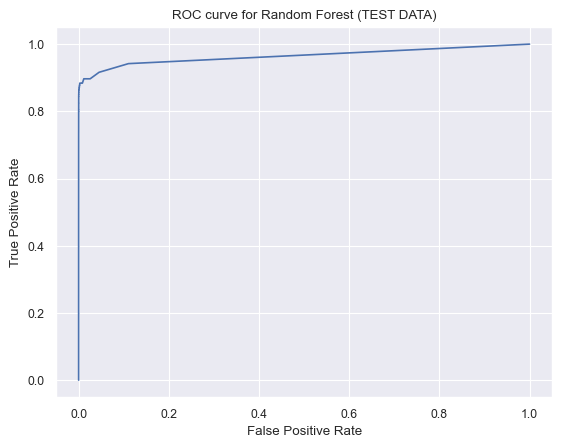

In [79]:
## 4. RANDOM FOREST (RF) ------------------------------------

# Train the model with the best hyperparameters found
RF_model = RandomForestClassifier()
RF_model.fit(X_train_COMBINE, y_train_COMBINE)

# Predict on the test data
y_pred_RF = RF_model.predict(X_test)

# Calculate and print the ROC AUC score on the test data
print("Random Forest Test AUC (COMBINE RESAMPLING):", round(roc_auc_score(y_test, RF_model.predict_proba(X_test)[:, 1]), 4))

# Print classification report for the test data ----------------
print('---------------------------')
print(classification_report(y_test, y_pred_RF))

# Plot ROC curve ----------------------------------------------
# Predict probabilities for the test data
proba_RF = RF_model.predict_proba(X_test)
# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_RF, tpr_RF, _RF = metrics.roc_curve(y_test, proba_RF[:, 1])

# Plotting the ROC curve
plt.plot(fpr_RF, tpr_RF)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for Random Forest (TEST DATA)")
plt.show()

KNN Test AUC (COMBINE RESAMPLING): 0.9415
---------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84963
           1       0.40      0.88      0.55       155

    accuracy                           1.00     85118
   macro avg       0.70      0.94      0.77     85118
weighted avg       1.00      1.00      1.00     85118



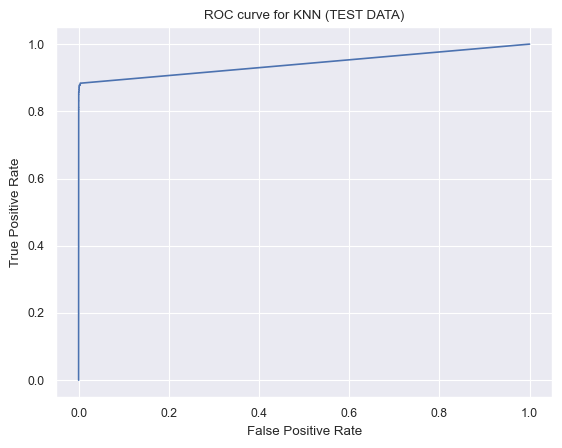

In [81]:
## KNN ----------------------------------------------

# Train the model with the best hyperparameters found
KNN_model = KNeighborsClassifier(metric='manhattan', n_neighbors=9,
                                weights='distance')
KNN_model.fit(X_train_COMBINE, y_train_COMBINE)

# Predict on the test data
y_pred_KNN = KNN_model.predict(X_test)

# Calculate and print the ROC AUC score on the test data
print("KNN Test AUC (COMBINE RESAMPLING):", round(roc_auc_score(y_test, KNN_model.predict_proba(X_test)[:, 1]), 4))

# Print classification report for the test data ----------------
print('---------------------------')
print(classification_report(y_test, y_pred_KNN))

# Plot ROC curve ----------------------------------------------
# Predict probabilities for the test data
proba_KNN = KNN_model.predict_proba(X_test)
# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_KNN, tpr_KNN, _KNN = metrics.roc_curve(y_test, proba_KNN[:, 1])

# Plotting the ROC curve
plt.plot(fpr_KNN, tpr_KNN)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for KNN (TEST DATA)")
plt.show()

DT Test AUC (COMBINE RESAMPLING): 0.912
---------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84963
           1       0.45      0.83      0.58       155

    accuracy                           1.00     85118
   macro avg       0.72      0.91      0.79     85118
weighted avg       1.00      1.00      1.00     85118



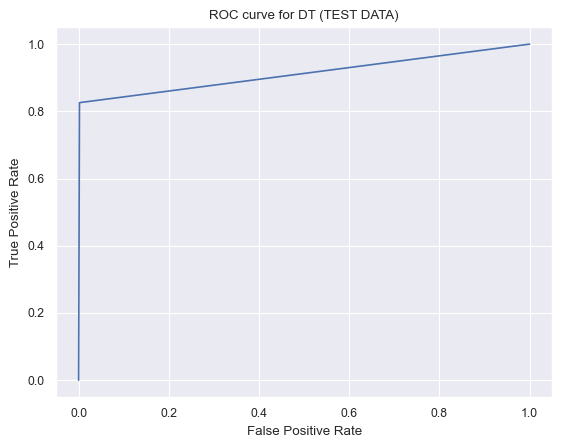

In [82]:
## DT ----------------------------------------------

# Train the model with the best hyperparameters found
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_COMBINE, y_train_COMBINE)

# Predict on the test data
y_pred_DT = DT_model.predict(X_test)

# Calculate and print the ROC AUC score on the test data
print("DT Test AUC (COMBINE RESAMPLING):", round(roc_auc_score(y_test, DT_model.predict_proba(X_test)[:, 1]), 4))

# Print classification report for the test data ----------------
print('---------------------------')
print(classification_report(y_test, y_pred_DT))

# Plot ROC curve ----------------------------------------------
# Predict probabilities for the test data
proba_DT = DT_model.predict_proba(X_test)
# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_DT, tpr_DT, _DT = metrics.roc_curve(y_test, proba_DT[:, 1])

# Plotting the ROC curve
plt.plot(fpr_DT, tpr_DT)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for DT (TEST DATA)")
plt.show()

### Compare the Training and Test AUC scores 

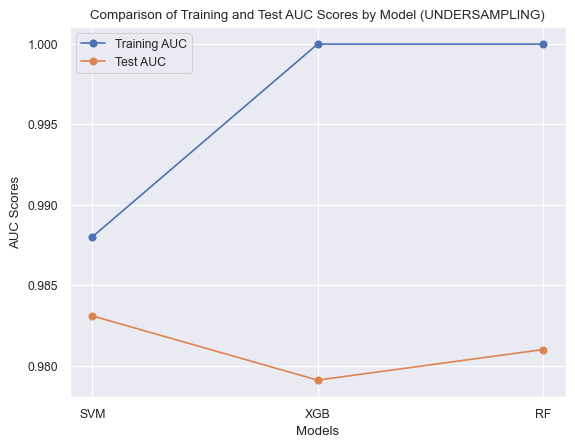

In [68]:
## UNDERSAMPLING: 
models_UNDER = ['SVM', 'XGB', 'RF']
training_scores_UNDER = [0.988, 1.00, 1.00] # training AUC scores
test_scores_UNDER = [0.9831, 0.9791, 0.981] # test AUC scores

plt.plot(models_UNDER, training_scores_UNDER, marker='o', label='Training AUC')
plt.plot(models_UNDER, test_scores_UNDER, marker='o', label='Test AUC')

plt.xlabel('Models')
plt.ylabel('AUC Scores')
plt.title('Comparison of Training and Test AUC Scores by Model (UNDERSAMPLING)')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/compareAUC_UNDER')


plt.show()

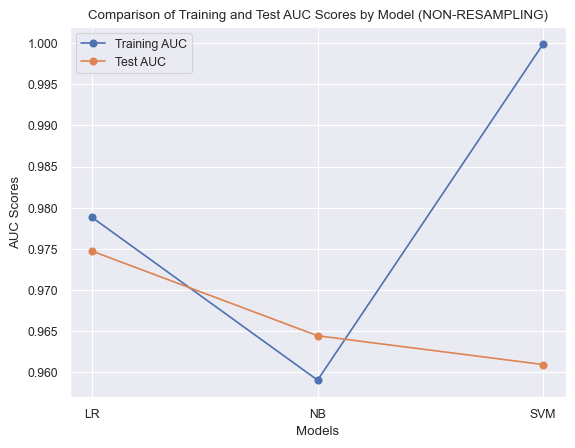

In [77]:
## NON-RESAMPLING: 
models_NON = ['LR', 'NB', 'SVM']
training_scores_NON = [0.9788, 0.959, 0.9999] # training AUC scores
test_scores_NON = [0.9747, 0.9644, 0.9609] # test AUC scores

plt.plot(models_NON, training_scores_NON, marker='o', label='Training AUC')
plt.plot(models_NON, test_scores_NON, marker='o', label='Test AUC')

plt.xlabel('Models')
plt.ylabel('AUC Scores')
plt.title('Comparison of Training and Test AUC Scores by Model (NON-RESAMPLING)')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/compareAUC_NON')


plt.show()

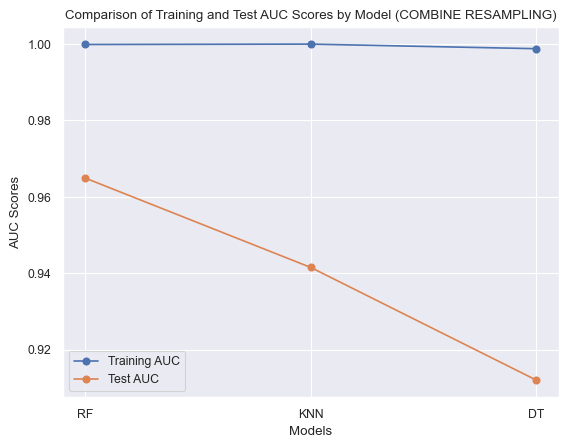

In [83]:
## COMBINE RESAMPLING: 
models_COMBINE = ['RF', 'KNN', 'DT']
training_scores_COMBINE = [0.9999, 1.0, 0.9988] # training AUC scores
test_scores_COMBINE = [0.9649, 0.9415, 0.912] # test AUC scores

plt.plot(models_COMBINE, training_scores_COMBINE, marker='o', label='Training AUC')
plt.plot(models_COMBINE, test_scores_COMBINE, marker='o', label='Test AUC')

plt.xlabel('Models')
plt.ylabel('AUC Scores')
plt.title('Comparison of Training and Test AUC Scores by Model (COMBINE RESAMPLING)')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('/Users/vydao/Desktop/images/compareAUC_COMBINE')

plt.show()

### 

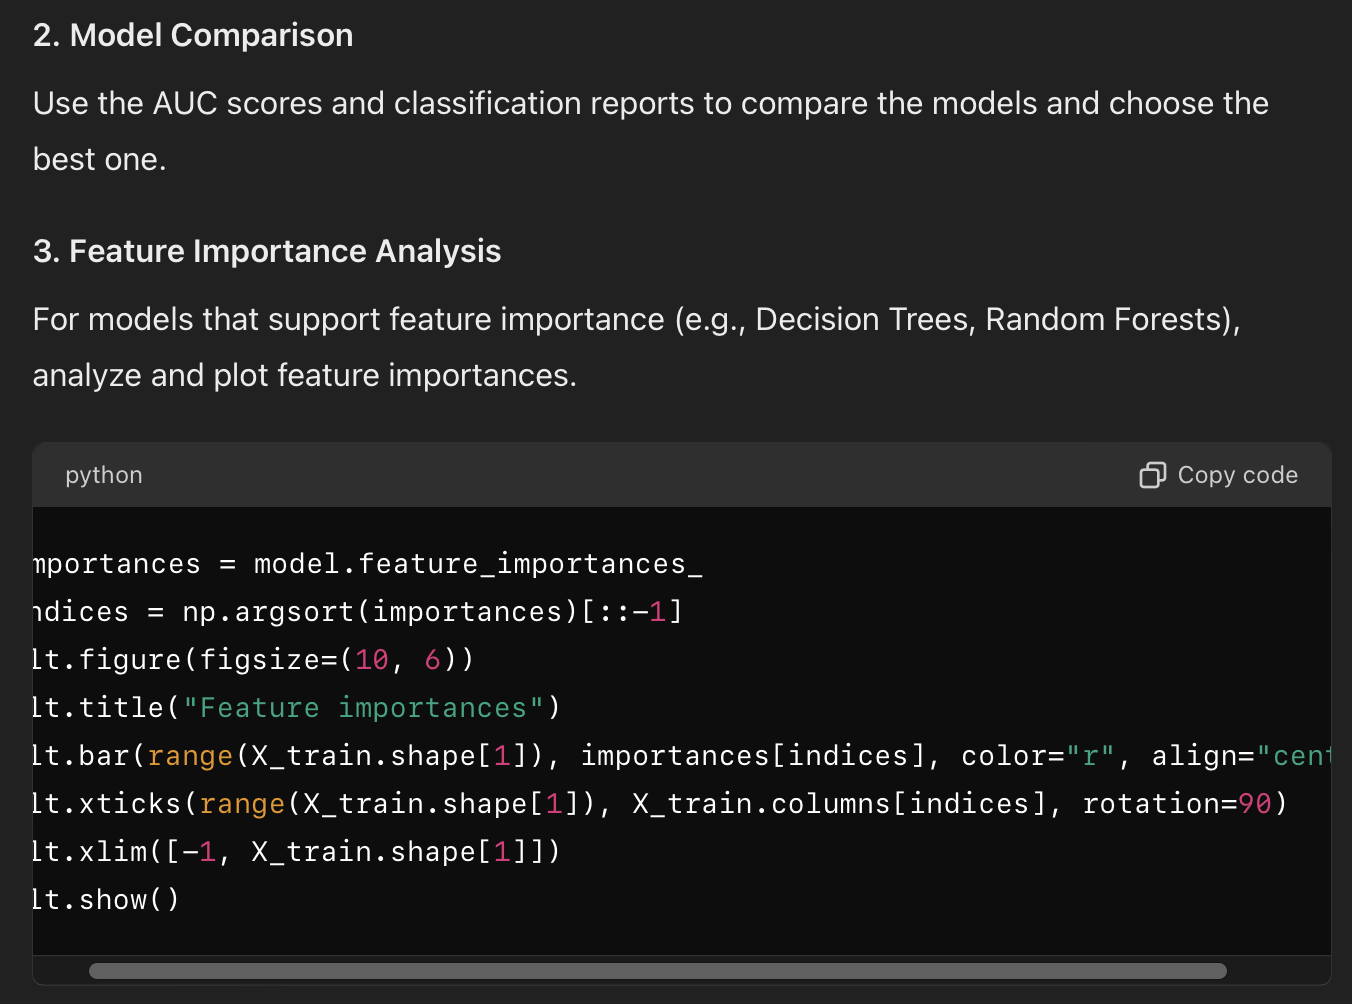
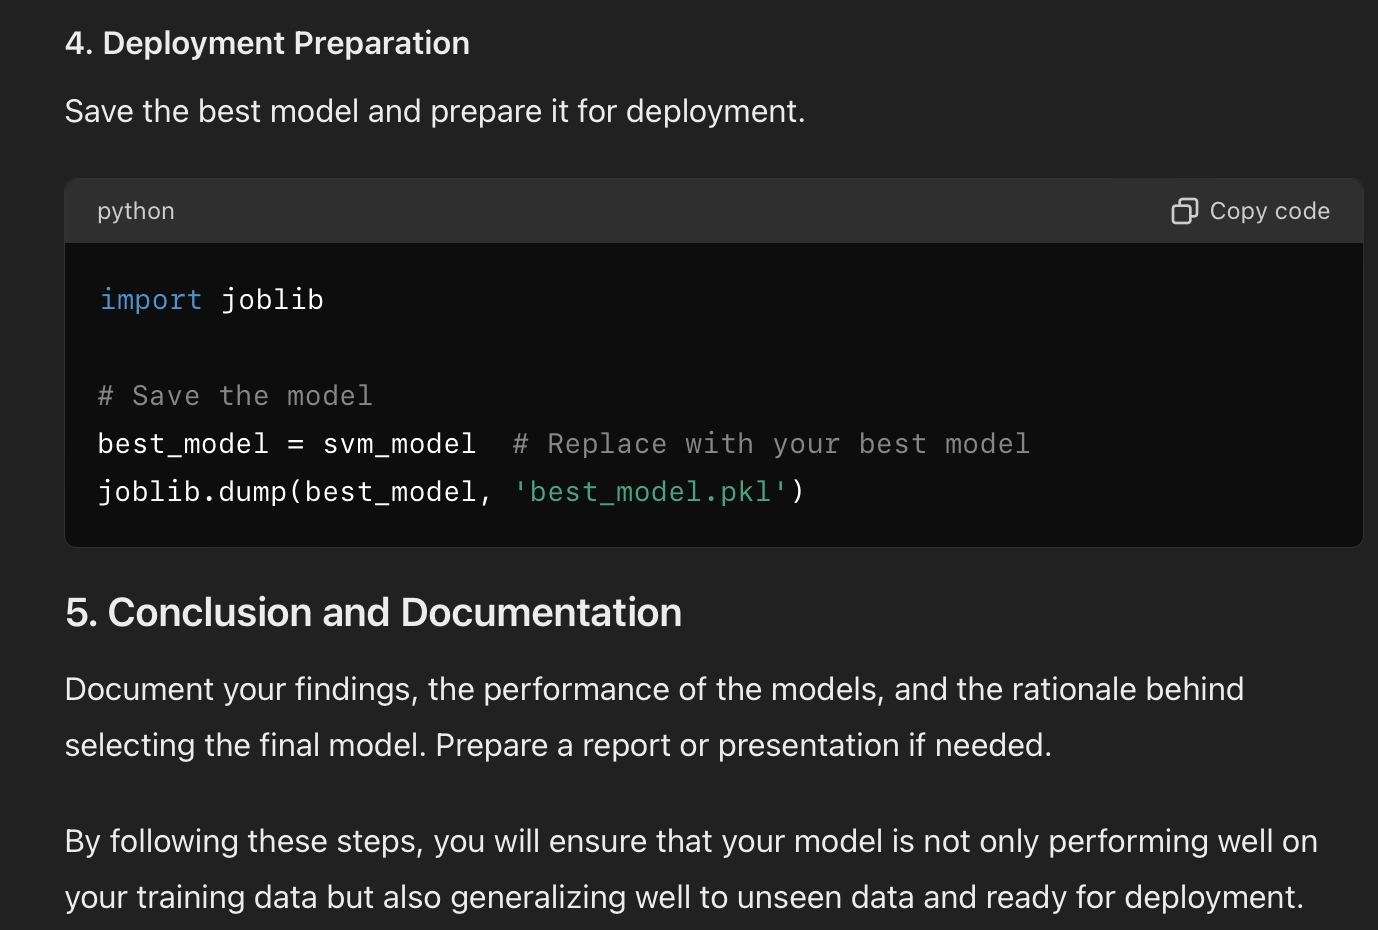


**joblib**
https://www.analyticsvidhya.com/blog/2023/02/how-to-save-and-load-machine-learning-models-in-python-using-joblib-library/

**Compare basic** https://towardsdatascience.com/how-to-compare-a-classification-model-to-a-baseline-fc3483367770

### Feature Important analysis
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

In [ ]:
## MOST IMPORTANCE FEATURES based on RANDOM FOREST -------------------
importances = RF_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train_Under.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train_Under.shape[1]), X_train_Under.columns[indices], rotation=90)
plt.xlim([-1, X_train_Under.shape[1]])
plt.show()

In [ ]:
## MOST IMPORTANCE FEATURES based on XGBOOST -------------------
importances = XGB_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train_Under.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train_Under.shape[1]), X_train_Under.columns[indices], rotation=90)
plt.xlim([-1, X_train_Under.shape[1]])
plt.show()

In [ ]:
## SHAP of XGBOOST
import shap

explainer = shap.Explainer(XGB_model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
plt.tight_layout();

### Boxplots of Predictors (X)